# Repaying the credit

# 

# Importing necessary libraries

In [111]:
import matplotlib.pyplot as plt             
from tabulate import tabulate              
import matplotlib as mat                   
import seaborn as sns                      
import pandas as pd                        
import numpy as np   

# Reading the file

In [112]:
df = pd.read_csv("DS1_C5_S4_Credit_Data_Hackathon.csv")

In [113]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [114]:
df_dict=pd.read_csv("DS1_C5_S4_Data_Dictionary_Credit_Data.csv")

In [115]:
df_dict

,index,Row,Description
0,1,SK_ID_CURR,ID of loan in our sample
1,2,TARGET,Target variable (1 - client with payment diffi...
2,3,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,4,GENDER,Gender of the client
4,5,Car,Flag if the client owns a car
5,6,House,Flag if client owns a house or flat
6,7,CNT_CHILDREN,Number of children the client has
7,8,AMT_INCOME_TOTAL,Income of the client
8,9,AMT_CREDIT,Credit amount of the loan
9,10,AMT_GOODS_PRICE,For consumer loans it is the price of the good...


# LEVEL 0 Analysis : Understanding data

* Reading top 5 rows

In [116]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


* Reading bottom 5 rows

In [117]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


* Number of rows and columns

In [118]:
print(df.shape)

(100000, 24)


In [119]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
count,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,9.991900e+04,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,99999.000000,100000.000000
mean,158006.140860,0.080930,0.417390,1.694261e+05,5.990034e+05,5.383451e+05,63292.222060,0.999990,0.82128,0.199740,0.997990,0.056190,2.155672,0.931210
std,33481.166996,0.272729,0.721014,3.835007e+05,4.020520e+05,3.693977e+05,140839.697296,0.003162,0.38312,0.399807,0.044788,0.230289,0.908897,0.343917
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,4.500000e+04,-17531.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,129076.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,-2758.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,157877.000000,0.000000,0.000000,1.440000e+05,5.130405e+05,4.500000e+05,-1219.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,186982.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,-291.000000,1.000000,1.00000,0.000000,1.000000,0.000000,3.000000,1.000000
max,216090.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,4.050000e+06,365243.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14.000000,4.000000


* Names of all columns

In [120]:
print(df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')


 * Information about dataset

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

* Count of non null records

In [122]:
print("count of non null records ")
df.count()

count of non null records 


SK_ID_CURR             100000
TARGET                 100000
NAME_CONTRACT_TYPE     100000
GENDER                 100000
Car                    100000
House                  100000
CNT_CHILDREN           100000
AMT_INCOME_TOTAL       100000
AMT_CREDIT             100000
AMT_GOODS_PRICE         99919
NAME_TYPE_SUITE         99595
NAME_INCOME_TYPE       100000
NAME_EDUCATION_TYPE    100000
NAME_FAMILY_STATUS     100000
DAYS_EMPLOYED          100000
MOBILE                 100000
WORK_PHONE             100000
HOME_PHONE             100000
MOBILE_REACHABLE       100000
FLAG_EMAIL             100000
OCCUPATION_TYPE         68776
CNT_FAM_MEMBERS         99999
APPLICATION_DAY        100000
TOTAL_DOC_SUBMITTED    100000
dtype: int64

* Datatypes of each column

In [123]:
print("Datatype of the columns")
df.dtypes

Datatype of the columns


SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
GENDER                  object
Car                     object
House                   object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
DAYS_EMPLOYED            int64
MOBILE                   int64
WORK_PHONE               int64
HOME_PHONE               int64
MOBILE_REACHABLE         int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
APPLICATION_DAY         object
TOTAL_DOC_SUBMITTED      int64
dtype: object

* Checking for null values in any columns

In [124]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

# Level 1 Analysis

* Separating Categorical and numerical variables

In [125]:
def separate_datatypes(df):
    categorical=[]
    numerical=[]
    for i in df.columns:
        if df[i].nunique()<100:
            categorical.append(i)
        else:
            numerical.append(i)
    return categorical,numerical
categorical,numerical=separate_datatypes(df)
from tabulate import tabulate
table = [categorical, numerical]
print(tabulate({"Categorical":categorical,
                "numerical": numerical}, headers = ["categorical", "numerical"]))

categorical          numerical
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


# Level 1 : Univariate Analysis

# Analysis of Categorical column

* Defining function for analysis of categorical column

In [126]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") 
    print(f"Mode of {col} is {df[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}")

* Checking for


~ Unique values


~ Mode



~ Total count of missing values

In [127]:
info_of_cat("TARGET")

Unique values in TARGET are: [1 0]
Mode of TARGET is 0
Number of missing values in TARGET is 0


In [128]:
info_of_cat("NAME_CONTRACT_TYPE")

Unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']
Mode of NAME_CONTRACT_TYPE is Cash loans
Number of missing values in NAME_CONTRACT_TYPE is 0


In [129]:
info_of_cat("GENDER")

Unique values in GENDER are: ['M' 'F' 'XNA']
Mode of GENDER is F
Number of missing values in GENDER is 0


In [130]:
info_of_cat("Car")

Unique values in Car are: ['N' 'Y']
Mode of Car is N
Number of missing values in Car is 0


In [131]:
info_of_cat("House")

Unique values in House are: ['Y' 'N']
Mode of House is Y
Number of missing values in House is 0


In [132]:
info_of_cat("CNT_CHILDREN")

Unique values in CNT_CHILDREN are: [ 0  1  2  3  4  7  5  6  8  9 11 12]
Mode of CNT_CHILDREN is 0
Number of missing values in CNT_CHILDREN is 0


In [133]:
info_of_cat("NAME_TYPE_SUITE")

Unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Mode of NAME_TYPE_SUITE is Unaccompanied
Number of missing values in NAME_TYPE_SUITE is 405


In [134]:
df["NAME_TYPE_SUITE"].fillna(df["NAME_TYPE_SUITE"].mode(),inplace=True)

In [135]:
info_of_cat("NAME_INCOME_TYPE")

Unique values in NAME_INCOME_TYPE are: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Mode of NAME_INCOME_TYPE is Working
Number of missing values in NAME_INCOME_TYPE is 0


In [136]:
info_of_cat("NAME_EDUCATION_TYPE")

Unique values in NAME_EDUCATION_TYPE are: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Mode of NAME_EDUCATION_TYPE is Secondary / secondary special
Number of missing values in NAME_EDUCATION_TYPE is 0


In [137]:
info_of_cat("NAME_FAMILY_STATUS")

Unique values in NAME_FAMILY_STATUS are: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Mode of NAME_FAMILY_STATUS is Married
Number of missing values in NAME_FAMILY_STATUS is 0


In [138]:
info_of_cat("MOBILE")

Unique values in MOBILE are: [1 0]
Mode of MOBILE is 1
Number of missing values in MOBILE is 0


In [139]:
info_of_cat("WORK_PHONE")

Unique values in WORK_PHONE are: [1 0]
Mode of WORK_PHONE is 1
Number of missing values in WORK_PHONE is 0


In [140]:
info_of_cat("HOME_PHONE")

Unique values in HOME_PHONE are: [0 1]
Mode of HOME_PHONE is 0
Number of missing values in HOME_PHONE is 0


In [141]:
info_of_cat("MOBILE_REACHABLE")

Unique values in MOBILE_REACHABLE are: [1 0]
Mode of MOBILE_REACHABLE is 1
Number of missing values in MOBILE_REACHABLE is 0


In [142]:
info_of_cat("FLAG_EMAIL")

Unique values in FLAG_EMAIL are: [0 1]
Mode of FLAG_EMAIL is 0
Number of missing values in FLAG_EMAIL is 0


In [143]:
info_of_cat("OCCUPATION_TYPE")

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is Laborers
Number of missing values in OCCUPATION_TYPE is 31224


In [144]:
df["OCCUPATION_TYPE"].fillna(df["OCCUPATION_TYPE"].mode(),inplace=True)

In [145]:
info_of_cat("CNT_FAM_MEMBERS")

Unique values in CNT_FAM_MEMBERS are: [ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14.]
Mode of CNT_FAM_MEMBERS is 2.0
Number of missing values in CNT_FAM_MEMBERS is 1


In [146]:
df["CNT_FAM_MEMBERS"].fillna(df["CNT_FAM_MEMBERS"].mode(),inplace=True)

In [147]:
info_of_cat("APPLICATION_DAY")

Unique values in APPLICATION_DAY are: ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
Mode of APPLICATION_DAY is TUESDAY
Number of missing values in APPLICATION_DAY is 0


In [148]:
info_of_cat("TOTAL_DOC_SUBMITTED")

Unique values in TOTAL_DOC_SUBMITTED are: [1 0 2 3 4]
Mode of TOTAL_DOC_SUBMITTED is 1
Number of missing values in TOTAL_DOC_SUBMITTED is 0


# Visual Representation of Categorical columns

* Analysis of Target column 

([<matplotlib.patches.Wedge at 0x272b91280d0>,
 [Text(-1.064637683852264, 0.2766705660558909, '0'),
  Text(1.0646376903282058, -0.2766705411362473, '1')],
 [Text(-0.48392621993284723, 0.12575934820722312, '91.9%'),
  Text(0.4839262228764571, -0.1257593368801124, '8.1%')])

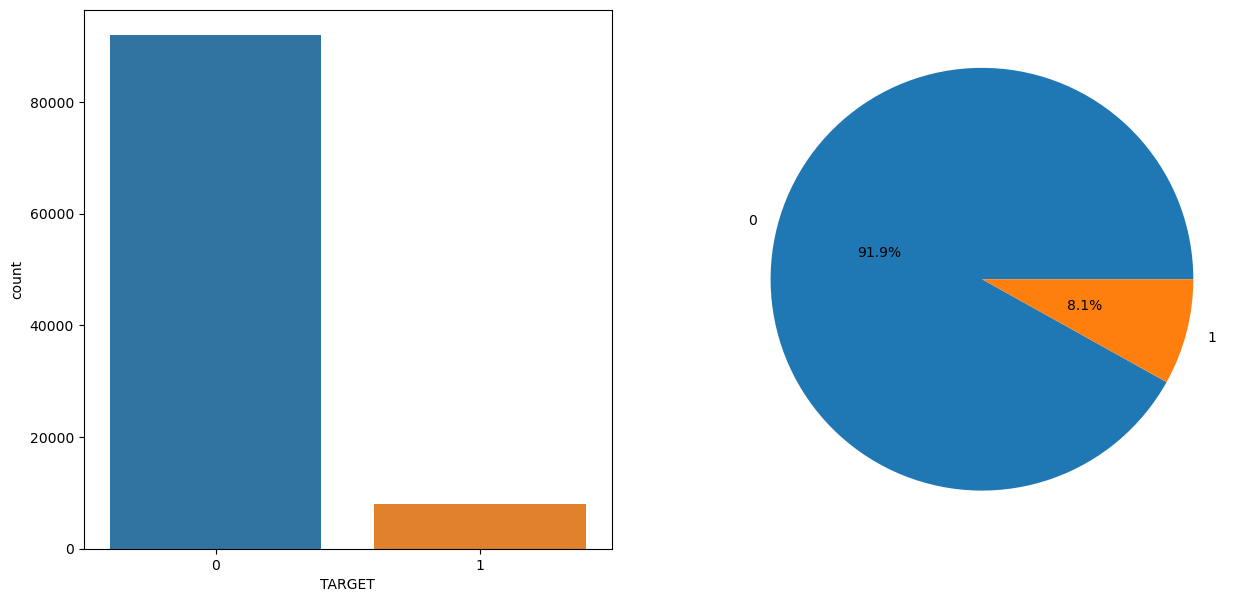

In [149]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = df["TARGET"].value_counts()                                                                                                      
labels =data.keys()                                                
sns.countplot(x = df["TARGET"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5) 

* Analysis of NAME_CONTRACT_TYPE column

([<matplotlib.patches.Wedge at 0x272b8a2d390>,
 [Text(-1.0515449322768324, 0.3228827270123195, 'Cash loans'),
  Text(1.051544954949677, -0.3228826531727622, 'Revolving loans')],
 [Text(-0.477974969216742, 0.14676487591469067, '90.5%'),
  Text(0.47797497952258033, -0.14676484235125553, '9.5%')])

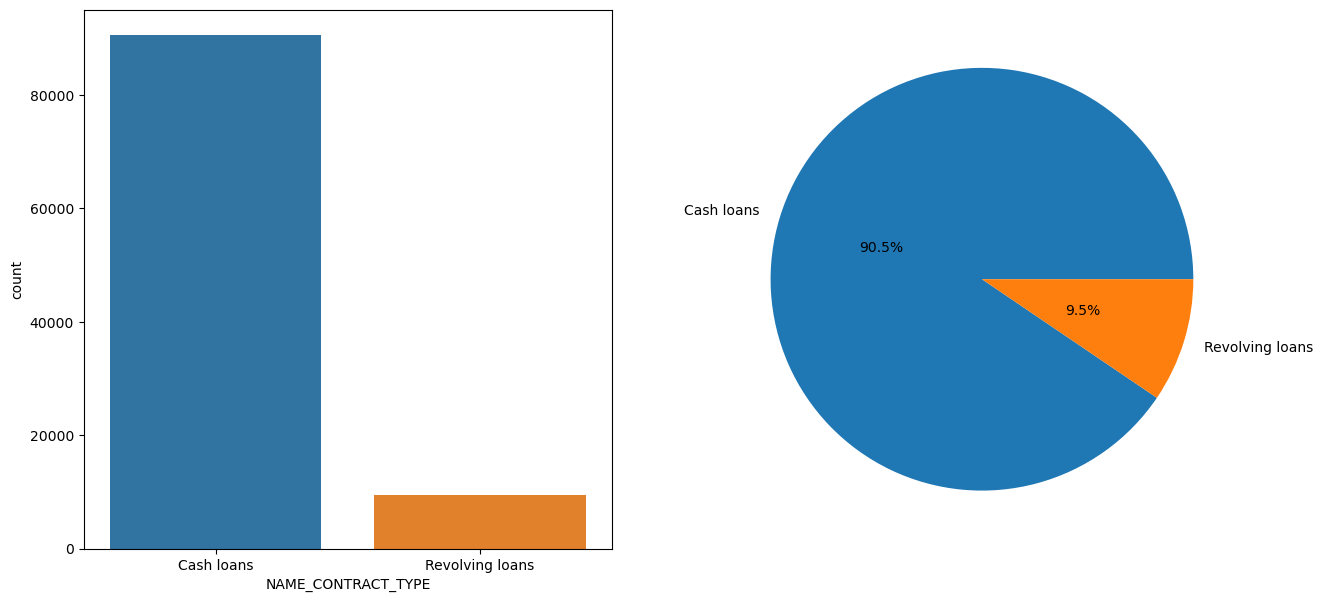

In [150]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = df["NAME_CONTRACT_TYPE"].value_counts()                                                                                                      
labels =data.keys()                                                
sns.countplot(x = df["NAME_CONTRACT_TYPE"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5) 

* Analysis of Gender column

In [151]:
a=df[df["GENDER"]=="XNA"].index
df=df.drop(a)

In [152]:
df["GENDER"].values

array(['M', 'F', 'M', ..., 'F', 'F', 'M'], dtype=object)

([<matplotlib.patches.Wedge at 0x272b8a90bd0>,
 [Text(-0.5255924923236904, 0.9663087146522956, 'F'),
  Text(0.5255924923236902, -0.9663087146522956, 'M')],
 [Text(-0.23890567832895016, 0.4392312339328616, '65.9%'),
  Text(0.2389056783289501, -0.4392312339328616, '34.1%')])

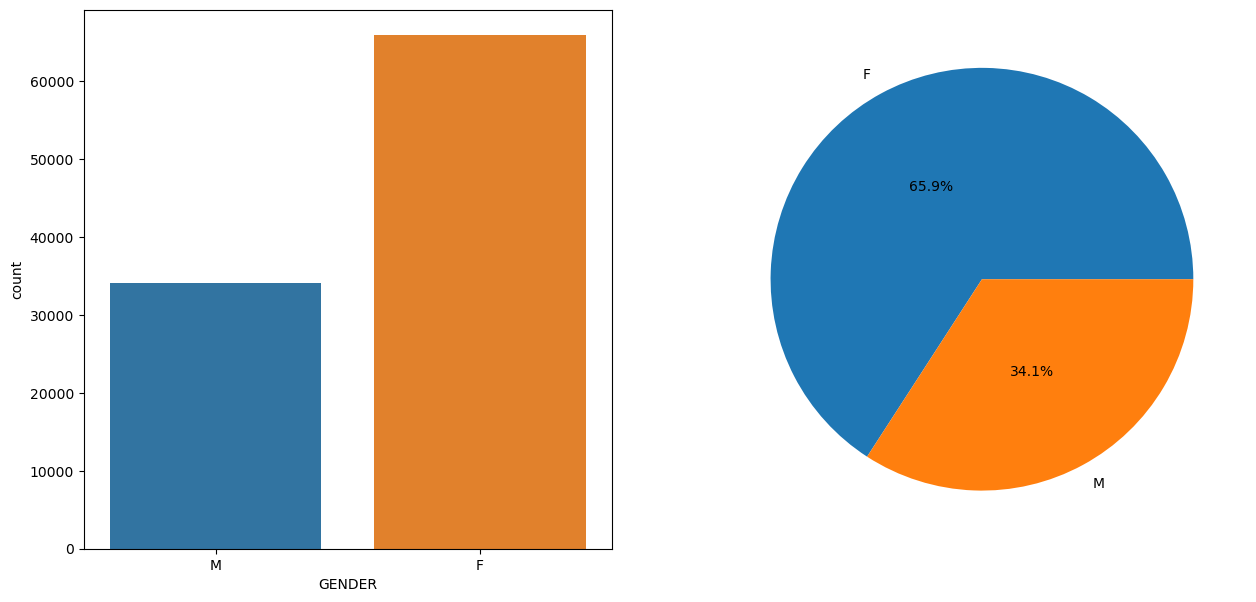

In [153]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = df["GENDER"].value_counts()                                                                                                      
labels =data.keys()                                                
sns.countplot(x = df["GENDER"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5) 

* Analysis of House column

([<matplotlib.patches.Wedge at 0x2728c9a3150>,
 [Text(-0.6276074693418903, 0.9033874387140151, 'Y'),
  Text(0.6276074693418902, -0.9033874387140152, 'N')],
 [Text(-0.28527612242813194, 0.4106306539609159, '69.3%'),
  Text(0.2852761224281319, -0.41063065396091597, '30.7%')])

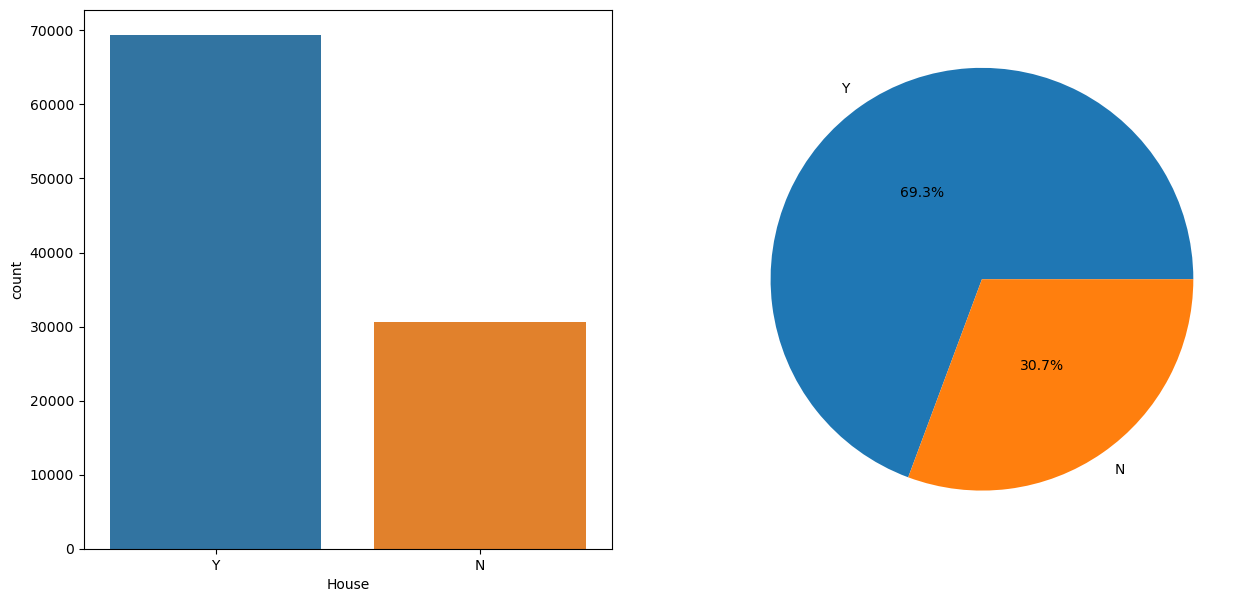

In [154]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = df["House"].value_counts()                                                                                                      
labels =data.keys()                                                
sns.countplot(x = df["House"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5) 

* Analysis of NAME_INCOME_TYPE column 

([<matplotlib.patches.Wedge at 0x272b864b790>,
 [Text(-0.06563960966627352, 1.098039817876774, 'Working'),
  Text(-0.7269551955581391, -0.8255520235884761, 'Commercial associate'),
  Text(0.5921509727288219, -0.9270152239830316, 'Pensioner'),
  Text(1.0731437896023939, -0.24158312614463182, 'State servant'),
  Text(1.0999992162456291, -0.0013131104301820997, 'Unemployed'),
  Text(1.0999998040955306, -0.0006564981296682123, 'Student'),
  Text(1.0999999804785685, -0.0002072369395966612, 'Businessman'),
  Text(1.0999999994607272, -3.444416330410679e-05, 'Maternity leave')],
 [Text(-0.02983618621194251, 0.4991090081258064, '51.9%'),
  Text(-0.3304341797991541, -0.3752509198129437, '23.2%'),
  Text(0.2691595330585554, -0.4213705563559234, '17.9%'),
  Text(0.48779263163745173, -0.10981051188392355, '7.0%'),
  Text(0.4999996437480132, -0.0005968683773554998, '0.0%'),
  Text(0.4999999109525139, -0.0002984082407582783, '0.0%'),
  Text(0.499999991126622, -9.419860890757327e-05, '0.0%'),
  Text(0

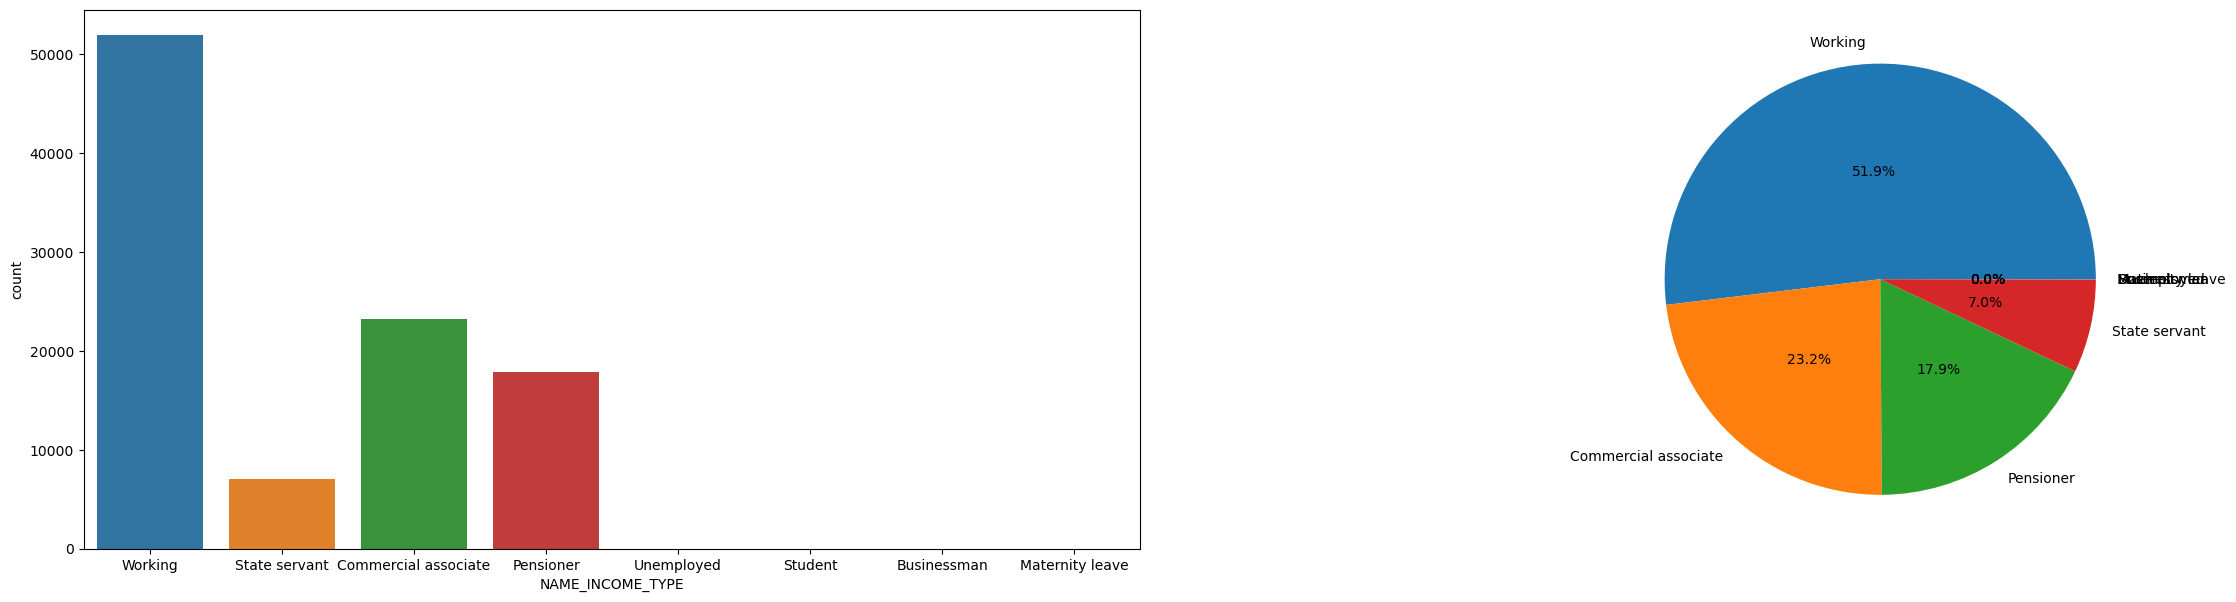

In [155]:
fig, ax = plt.subplots(1, 2, figsize = (30, 7))
data = df["NAME_INCOME_TYPE"].value_counts()                                                                                                      
labels =data.keys()                                                
sns.countplot(x = df["NAME_INCOME_TYPE"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5) 

In [156]:
df=df.drop(df[(df["NAME_INCOME_TYPE"]=="Unemployed")|(df["NAME_INCOME_TYPE"]=="Student")|(df["NAME_INCOME_TYPE"]=="Businessman")|(df["NAME_INCOME_TYPE"]=="Maternity leave")].index)

([<matplotlib.patches.Wedge at 0x2728cb12150>,
 [Text(-0.06606933332099058, 1.0980140450807174, 'Working'),
  Text(-0.7261641083988676, -0.8262479577422736, 'Commercial associate'),
  Text(0.5933256362668933, -0.9262638335531007, 'Pensioner'),
  Text(1.0734941866700571, -0.24002131402355198, 'State servant')],
 [Text(-0.030031515145904807, 0.49909729321850793, '51.9%'),
  Text(-0.330074594726758, -0.3755672535192152, '23.2%'),
  Text(0.26969347103040603, -0.4210290152514094, '17.9%'),
  Text(0.48795190303184416, -0.10910059728343272, '7.0%')])

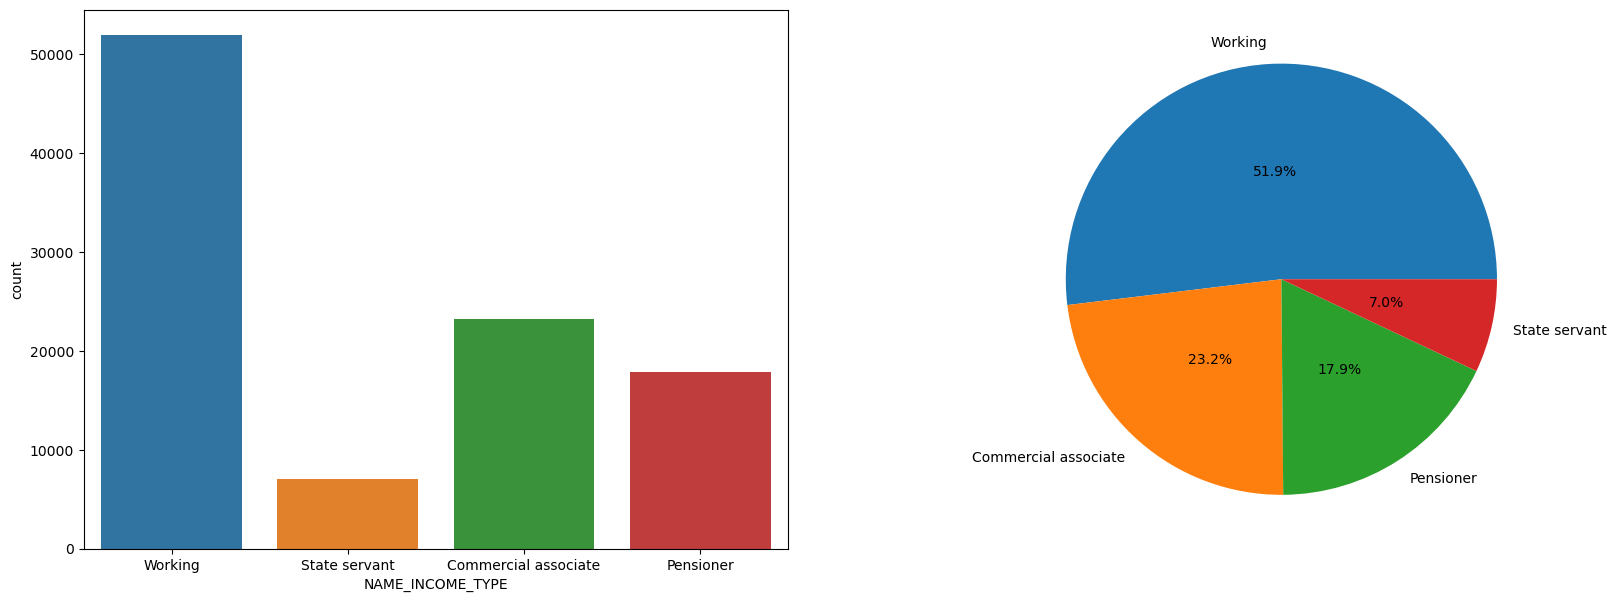

In [157]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
data = df["NAME_INCOME_TYPE"].value_counts()                                                                                                      
labels =data.keys()                                                
sns.countplot(x = df["NAME_INCOME_TYPE"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5) 

* Analysis of NAME_EDUCATION_TYPE column

([<matplotlib.patches.Wedge at 0x2728c4f4490>,
 [Text(-0.6762216818393209, 0.8675968170817597, 'Secondary / secondary special'),
  Text(0.5462336397863429, -0.95479254854956, 'Higher education'),
  Text(1.0818111935464472, -0.19920979272518544, 'Incomplete higher'),
  Text(1.0990652254660782, -0.04533905789932872, 'Lower secondary'),
  Text(1.0999986956639958, -0.0016939709288831038, 'Academic degree')],
 [Text(-0.30737349174514583, 0.39436218958261804, '71.1%'),
  Text(0.24828801808470127, -0.4339966129770727, '24.4%'),
  Text(0.4917323607029305, -0.0905499057841752, '3.3%'),
  Text(0.499575102484581, -0.02060866268151305, '1.2%'),
  Text(0.4999994071199981, -0.0007699867858559562, '0.0%')])

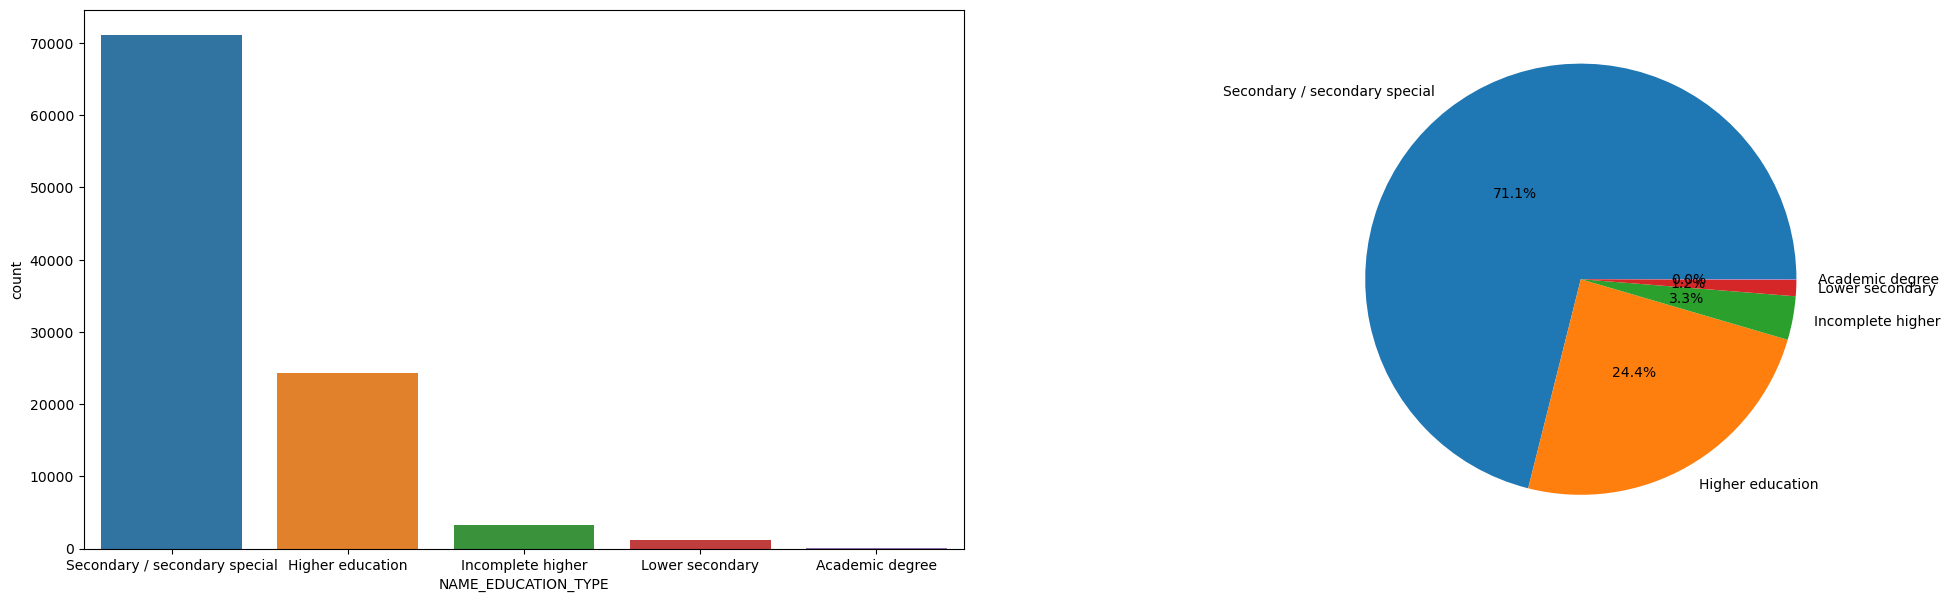

In [158]:
fig, ax = plt.subplots(1, 2, figsize = (25, 7))
data = df["NAME_EDUCATION_TYPE"].value_counts()                                                                                                      
labels =data.keys()                                                
sns.countplot(x = df["NAME_EDUCATION_TYPE"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5) 

* Analysis of OCCUPATION_TYPE column 

Text(0.5, 0, 'Occupation type')

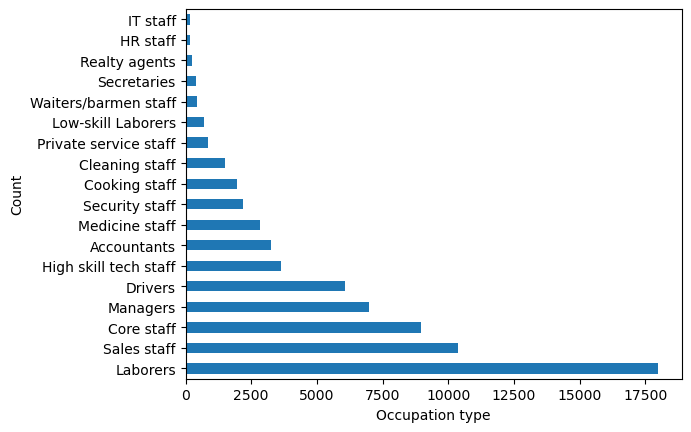

In [159]:
df["OCCUPATION_TYPE"].value_counts().plot(kind="barh")
plt.ylabel("Count")
plt.xlabel("Occupation type")

* Analysis of TOTAL_DOC_SUBMITTED column

([<matplotlib.patches.Wedge at 0x2728c495510>,
 [Text(-1.0211397139067044, 0.40899105697134047, '1'),
  Text(0.9842927966902144, -0.49108827147851564, '0'),
  Text(1.0961708688511924, -0.0917029240647337, '2'),
  Text(1.0999984745066895, -0.0018319615051515326, '3'),
  Text(1.0999999994594178, -3.448595247265629e-05, '4')],
 [Text(-0.4641544154121383, 0.18590502589606384, '87.9%'),
  Text(0.44740581667737017, -0.22322194158114345, '9.5%'),
  Text(0.498259485841451, -0.041683147302151675, '2.6%'),
  Text(0.4999993065939497, -0.0008327097750688784, '0.1%'),
  Text(0.4999999997542808, -1.5675432942116492e-05, '0.0%')])

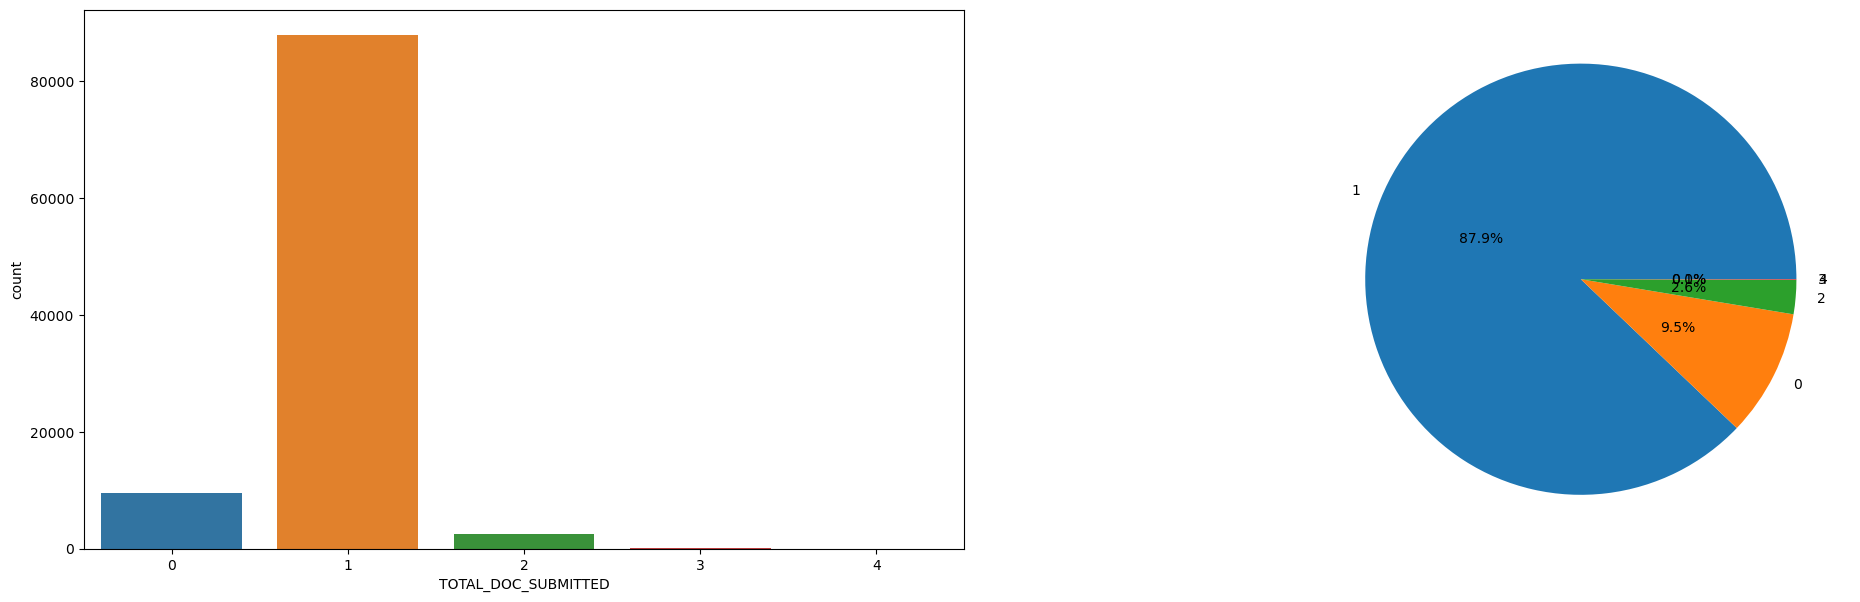

In [160]:
fig, ax = plt.subplots(1, 2, figsize = (25, 7))
data = df["TOTAL_DOC_SUBMITTED"].value_counts()                                                                                                      
labels =data.keys()                                                
sns.countplot(x = df["TOTAL_DOC_SUBMITTED"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5) 

# Analysis of Numerical Columns

* Defining function for calculating mean, median, mode, standard deviation, and count of all null values

In [161]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

* Analysis of AMT_INCOME_TOTAL column

In [162]:
info_of_numerical("AMT_INCOME_TOTAL")

The mean of the AMT_INCOME_TOTAL is 169394.65432991908
The median of the AMT_INCOME_TOTAL is 144000.0
The mode of the AMT_INCOME_TOTAL is 135000.0
The standard deviation of the AMT_INCOME_TOTAL is 383483.4537237474
Number of missing values in the AMT_INCOME_TOTAL is 0


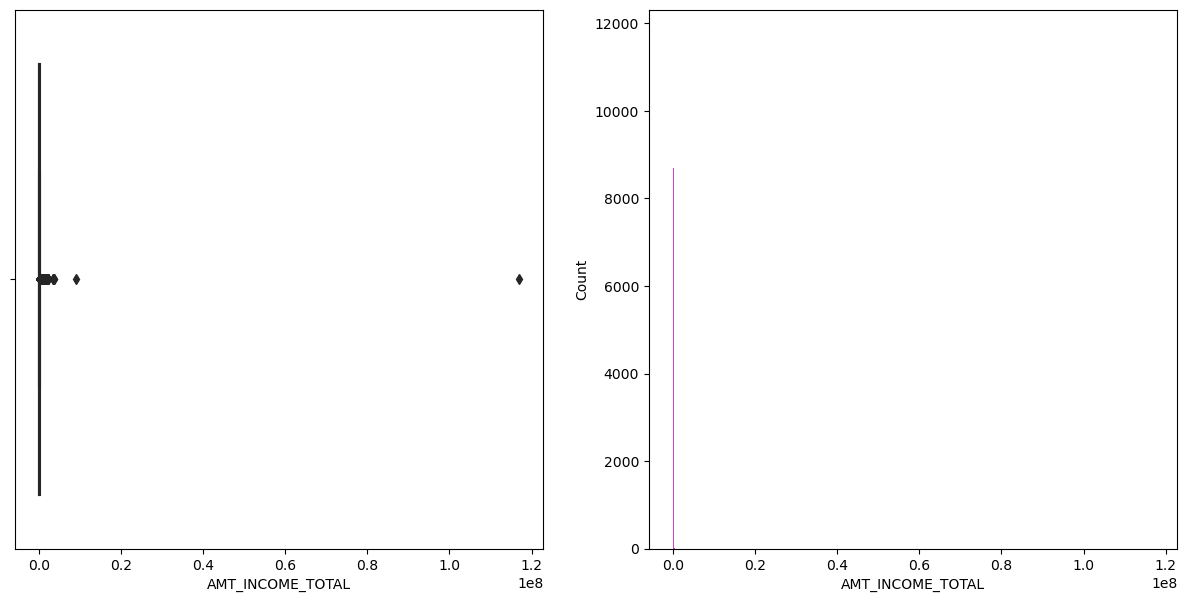

In [163]:
fig, ax = plt.subplots(1, 2, figsize= (15, 7))               
sns.histplot(x = df["AMT_INCOME_TOTAL"], ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_INCOME_TOTAL"], ax = ax[0], color = "g") 
plt.show()

In [54]:
df["AMT_INCOME_TOTAL"].values

array([202500., 270000.,  67500., ..., 135000., 135000., 202500.])

In [164]:
lb=df["AMT_INCOME_TOTAL"].quantile(0.25)
ub=df["AMT_INCOME_TOTAL"].quantile(0.75)

In [165]:
outliers=df[(df["AMT_INCOME_TOTAL"]<lb)|(df["AMT_INCOME_TOTAL"]>ub)]

In [166]:
df.loc[df["AMT_INCOME_TOTAL"]<lb,"AMT_INCOME_TOTAL"]=df["AMT_INCOME_TOTAL"].mean()
df.loc[df["AMT_INCOME_TOTAL"]>ub,"AMT_INCOME_TOTAL"]=df["AMT_INCOME_TOTAL"].mean()

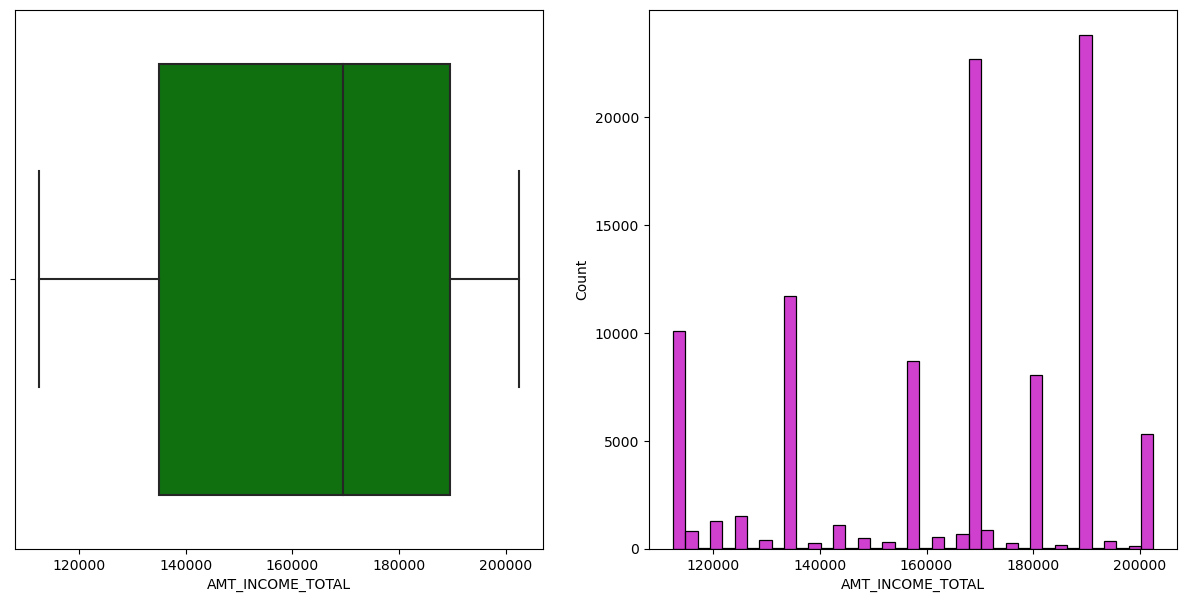

In [167]:
fig, ax = plt.subplots(1, 2, figsize= (15, 7))               
sns.histplot(x = df["AMT_INCOME_TOTAL"], ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_INCOME_TOTAL"], ax = ax[0], color = "g") 
plt.show()

* Analysis of AMT_CREDIT column

In [168]:
info_of_numerical("AMT_CREDIT")

The mean of the AMT_CREDIT is 598987.472392546
The median of the AMT_CREDIT is 513040.5
The mode of the AMT_CREDIT is 450000.0
The standard deviation of the AMT_CREDIT is 402031.6133389632
Number of missing values in the AMT_CREDIT is 0


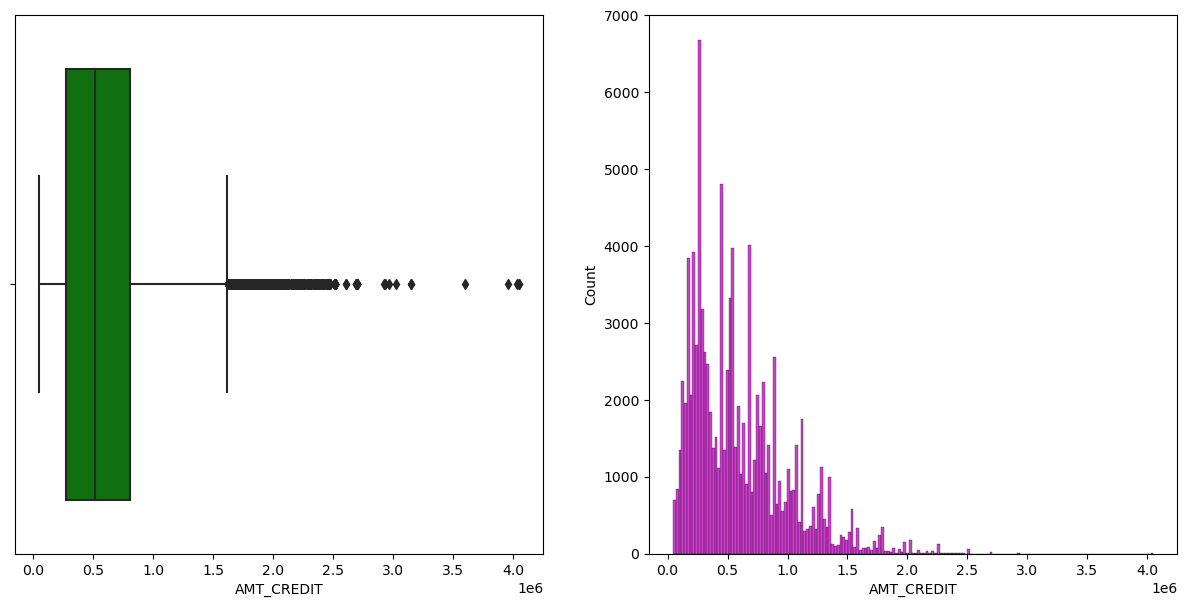

In [169]:
fig, ax = plt.subplots(1, 2, figsize= (15, 7))               
sns.histplot(x = df["AMT_CREDIT"], ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_CREDIT"], ax = ax[0], color = "g") 
plt.show()

In [170]:
lb1=df["AMT_CREDIT"].quantile(0.25)
ub1=df["AMT_CREDIT"].quantile(0.75)
outliers1=df[(df["AMT_CREDIT"]<lb1)|(df["AMT_CREDIT"]>ub1)]
df.loc[df["AMT_CREDIT"]<lb1,"AMT_CREDIT"]=df["AMT_CREDIT"].mean()
df.loc[df["AMT_CREDIT"]>ub1,"AMT_CREDIT"]=df["AMT_CREDIT"].mean()

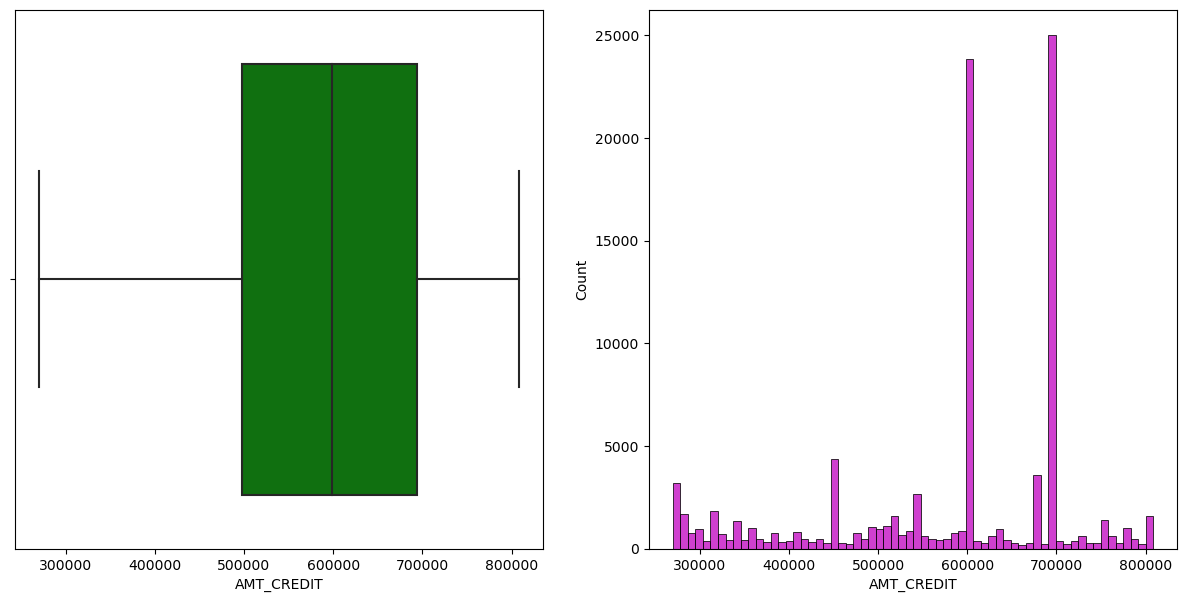

In [171]:
fig, ax = plt.subplots(1, 2, figsize= (15, 7))               
sns.histplot(x = df["AMT_CREDIT"], ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_CREDIT"], ax = ax[0], color = "g") 
plt.show()

* Analysis of AMT_GOODS_PRICE column

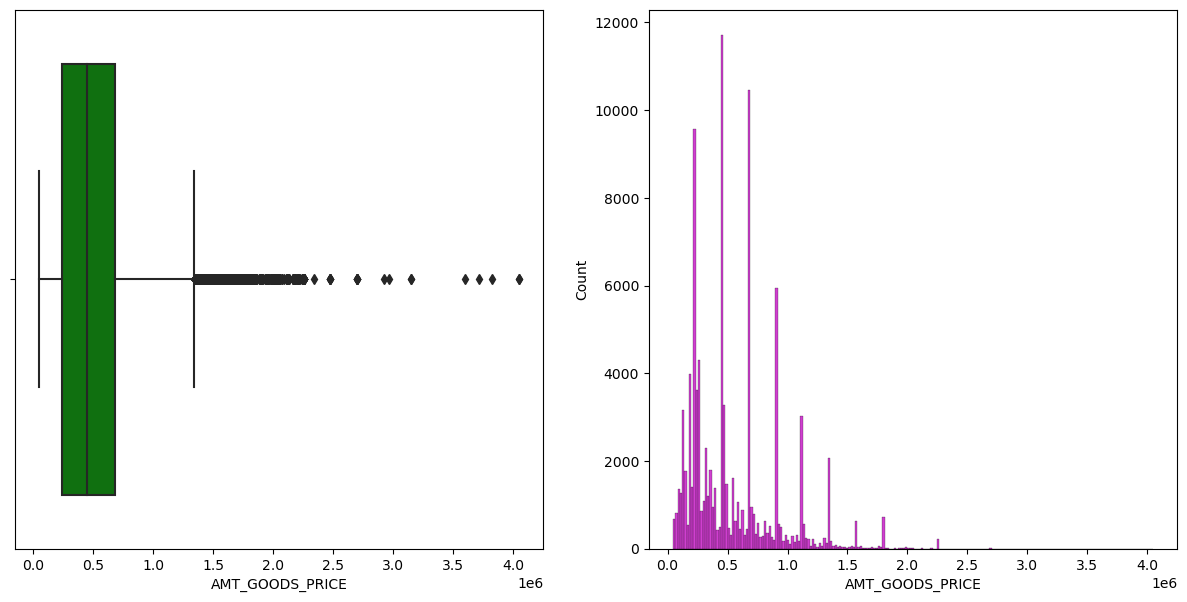

In [172]:
fig, ax = plt.subplots(1, 2, figsize= (15, 7))               
sns.histplot(x = df["AMT_GOODS_PRICE"], ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_GOODS_PRICE"], ax = ax[0], color = "g") 
plt.show()

In [173]:
lb2=df["AMT_GOODS_PRICE"].quantile(0.25)
ub2=df["AMT_GOODS_PRICE"].quantile(0.75)
outliers2=df[(df["AMT_GOODS_PRICE"]<lb2)|(df["AMT_GOODS_PRICE"]>ub2)]
df.loc[df["AMT_GOODS_PRICE"]<lb2,"AMT_GOODS_PRICE"]=df["AMT_GOODS_PRICE"].mean()
df.loc[df["AMT_GOODS_PRICE"]>ub2,"AAMT_GOODS_PRICE"]=df["AMT_GOODS_PRICE"].mean()

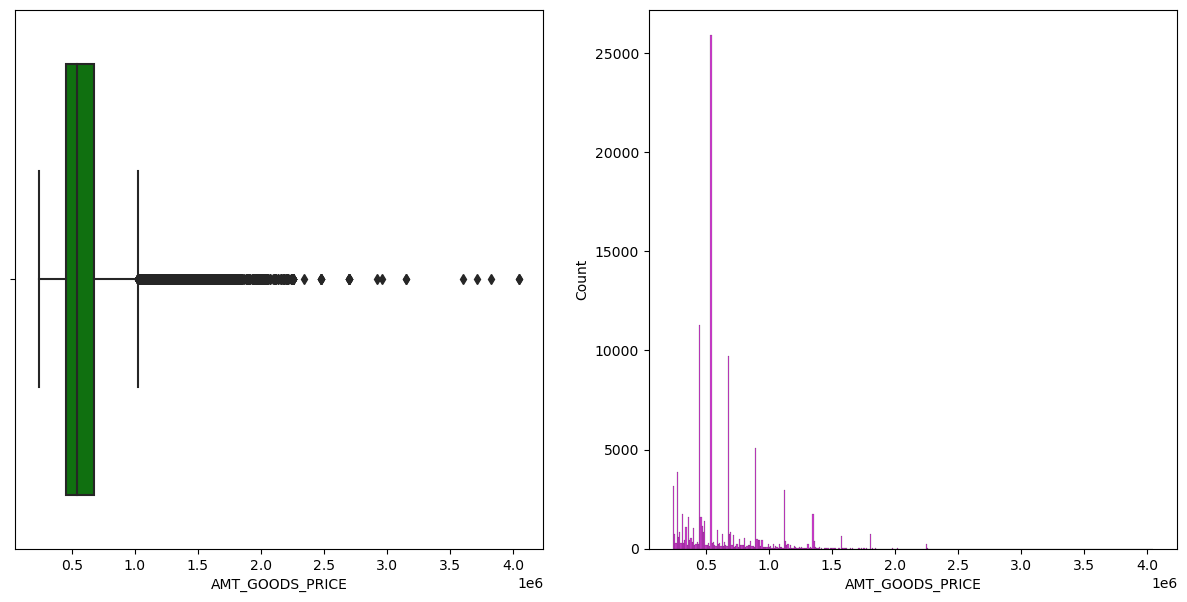

In [174]:
fig, ax = plt.subplots(1, 2, figsize= (15, 7))               
sns.histplot(x = df["AMT_GOODS_PRICE"], ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_GOODS_PRICE"], ax = ax[0], color = "g") 
plt.show()

* Analysis of DAYS_EMPLOYED column

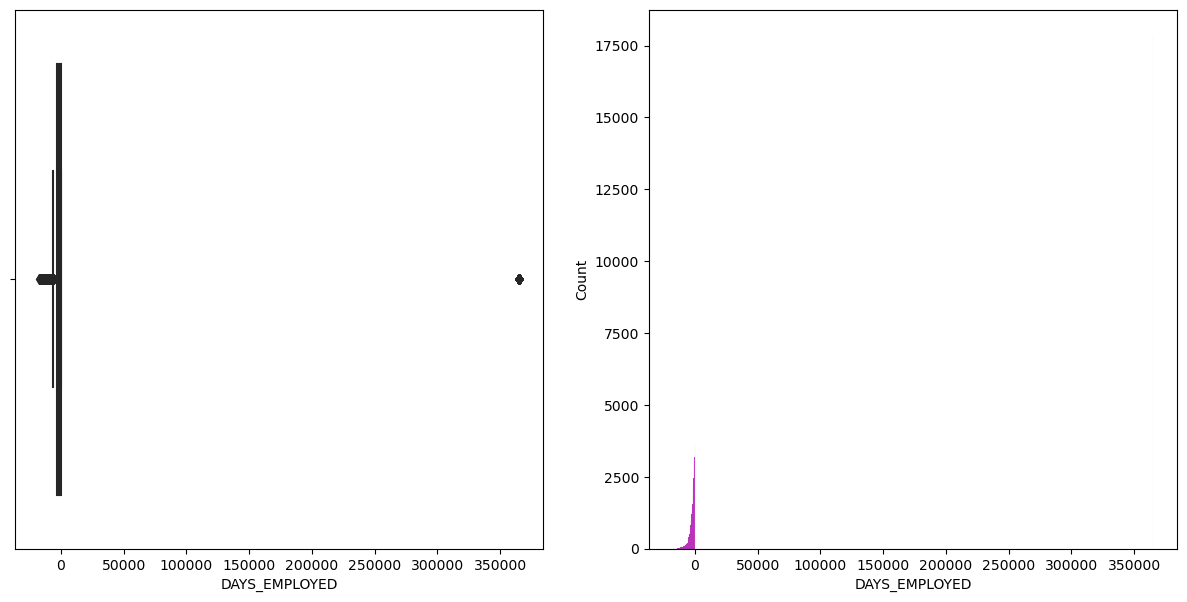

In [175]:
fig, ax = plt.subplots(1, 2, figsize= (15, 7))               
sns.histplot(x = df["DAYS_EMPLOYED"], ax =ax[1], color = "m") 
sns.boxplot(x = df["DAYS_EMPLOYED"], ax = ax[0], color = "g") 
plt.show()

In [176]:
lb3=df["DAYS_EMPLOYED"].quantile(0.25)
ub3=df["DAYS_EMPLOYED"].quantile(0.75)
outliers3=df[(df["DAYS_EMPLOYED"]<lb3)|(df["DAYS_EMPLOYED"]>ub3)]
df.loc[df["DAYS_EMPLOYED"]<lb3,"DAYS_EMPLOYED"]=df["DAYS_EMPLOYED"].mean()
df.loc[df["DAYS_EMPLOYED"]>ub3,"DAYS_EMPLOYED"]=df["DAYS_EMPLOYED"].mean()

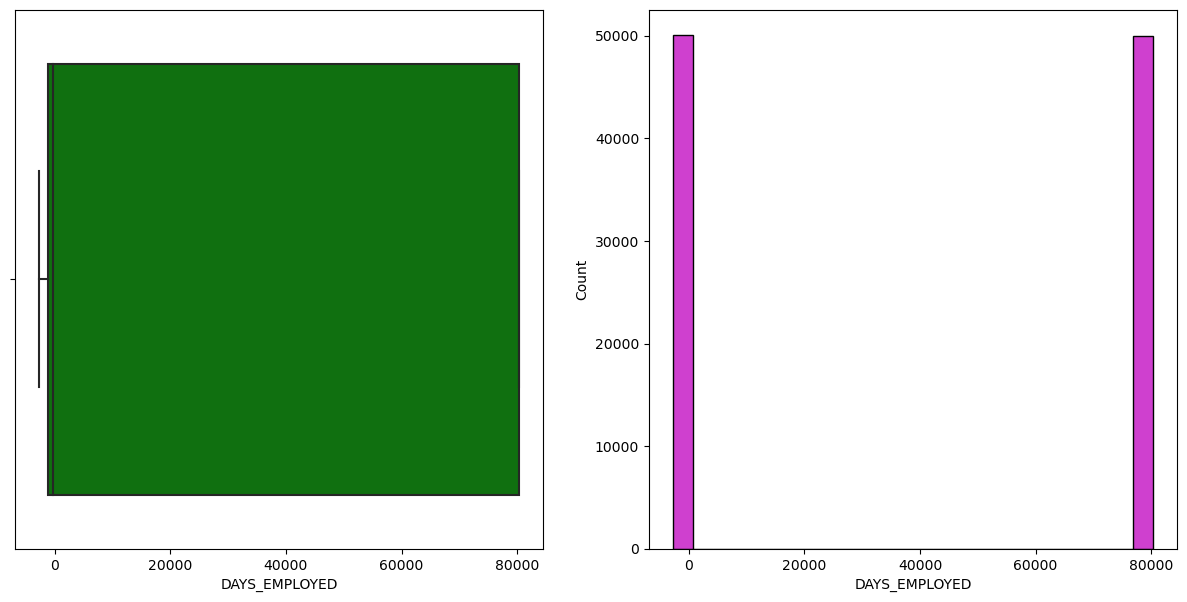

In [177]:
fig, ax = plt.subplots(1, 2, figsize= (15, 7))               
sns.histplot(x = df["DAYS_EMPLOYED"], ax =ax[1], color = "m") 
sns.boxplot(x = df["DAYS_EMPLOYED"], ax = ax[0], color = "g") 
plt.show()

# Level 2 : Bivariate Analysis

In [178]:
print(tabulate({"Categorical":categorical,
                "numerical": numerical}, headers = ["categorical", "numerical"]))

categorical          numerical
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


* Relationship of Target column with NAME_CONTRACT_TYPE

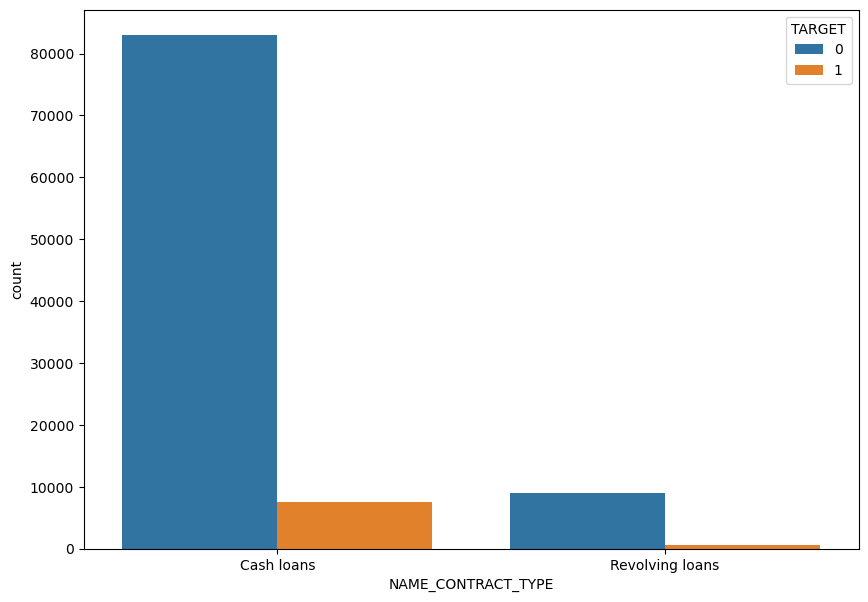

In [179]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = "TARGET", data = df)
plt.show()

# Further Analysis ( Level 3)

1. What is the source of income they are getting to repay the cash loans ? (NAME_INCOME_TYPE wise contract type analysis)

In [180]:
a=df[df["NAME_CONTRACT_TYPE"]=="Cash loans"]

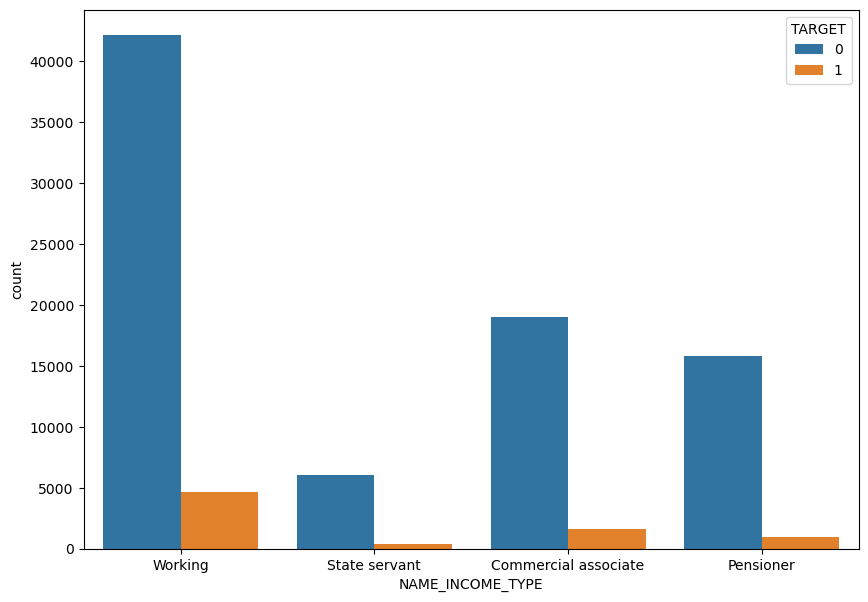

In [181]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "NAME_INCOME_TYPE", hue = "TARGET", data = a)
plt.show()

In [182]:
b=df[df["NAME_CONTRACT_TYPE"]=="Revolving loans"]

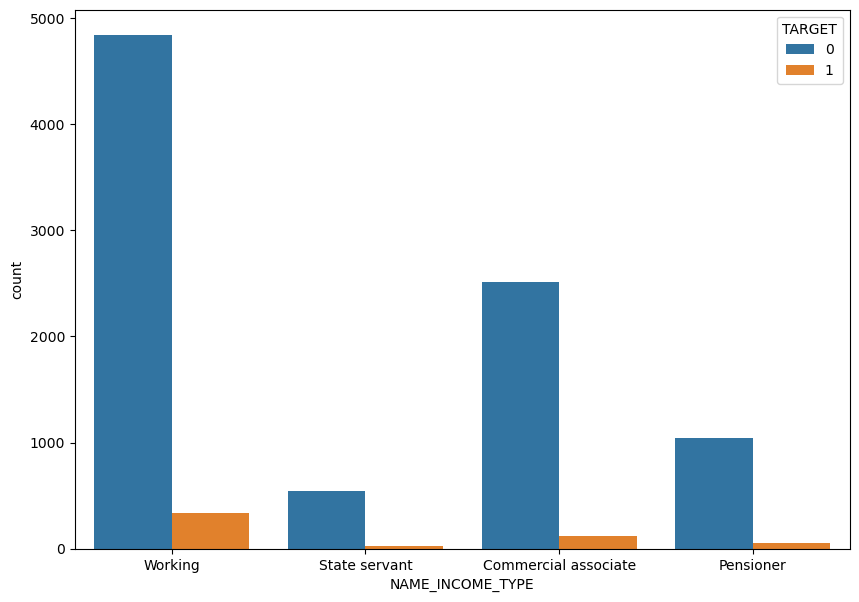

In [183]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "NAME_INCOME_TYPE", hue = "TARGET", data = b)
plt.show()

* Relationship of Target column with GENDER

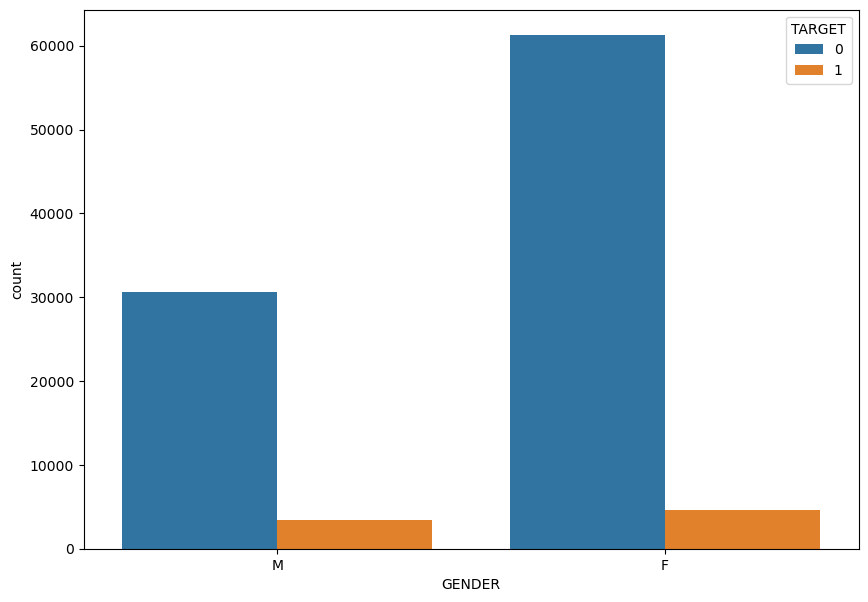

In [184]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "GENDER", hue = "TARGET", data = df)
plt.show()

# Further Analysis ( Level 3)

1. What is the occupation type of male and female non defaulters ? 

In [185]:
c=df[df["GENDER"]=="F"]

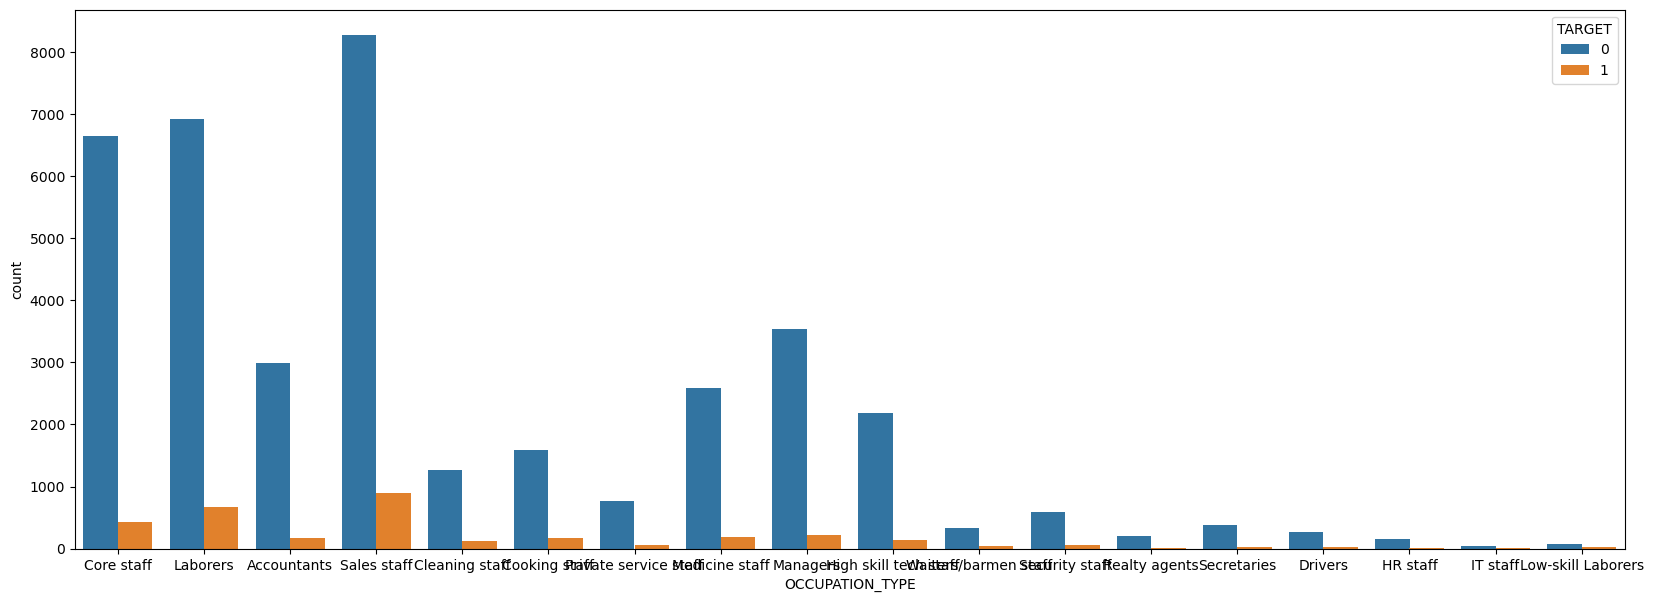

In [186]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x = "OCCUPATION_TYPE", hue = "TARGET", data = c)
plt.show()

* Relationship of Target column with House

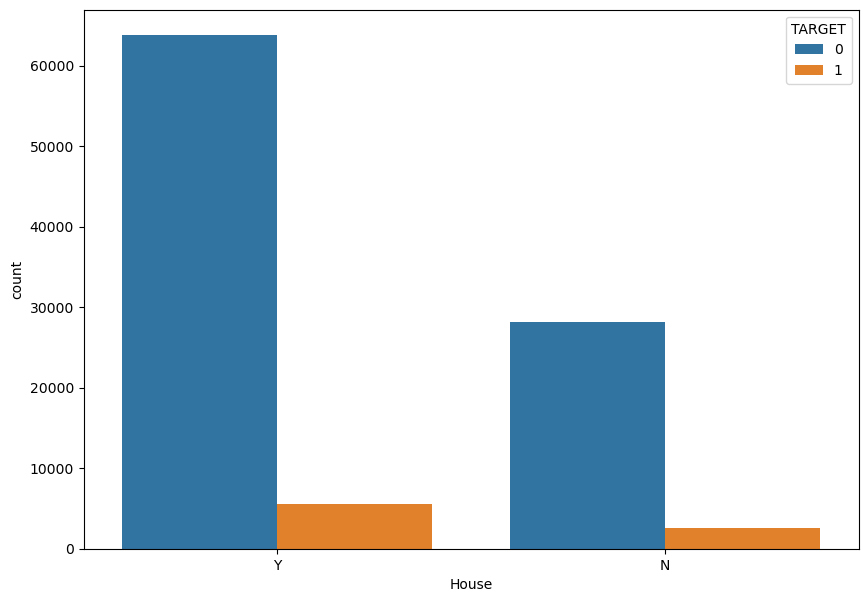

In [187]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "House", hue = "TARGET", data = df)
plt.show()

* Relationship of Target column with NAME_INCOME_TYPE

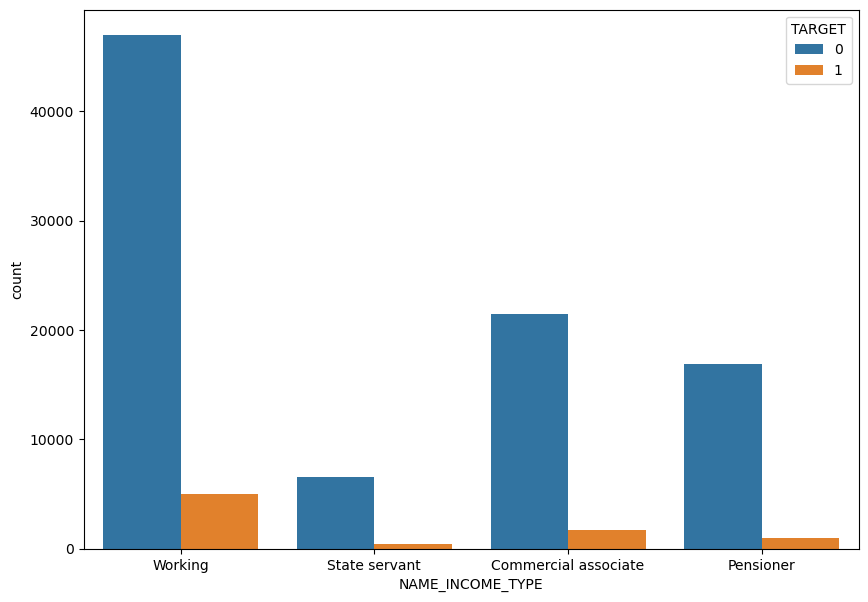

In [188]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "NAME_INCOME_TYPE", hue = "TARGET", data = df)
plt.show()

# Further Analysis ( Level 3)

1. Applicants with which income type has applied for cash loans ?
2. Analyse the target of female applicants based on income type ?

* Relationship of Target column with NAME_EDUCATION_TYPE

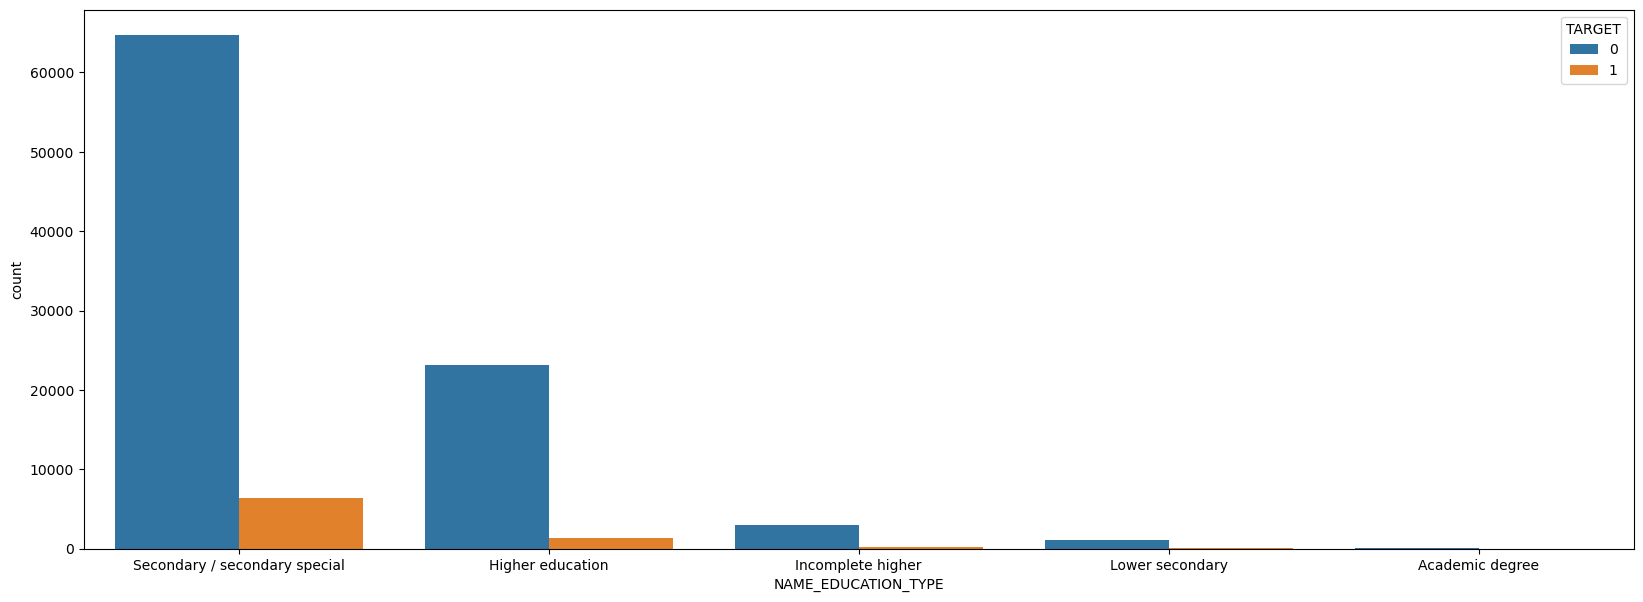

In [189]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x = "NAME_EDUCATION_TYPE", hue = "TARGET", data = df)
plt.show()

# Further Analysis ( Level 3)

1. Income type wise relation of applicants who completed secondary education and still facing payment difficulties ?

In [190]:
df["NAME_EDUCATION_TYPE"].values

array(['Secondary / secondary special', 'Higher education',
       'Secondary / secondary special', ...,
       'Secondary / secondary special', 'Secondary / secondary special',
       'Secondary / secondary special'], dtype=object)

In [191]:
d=df[df["NAME_EDUCATION_TYPE"]=="Secondary / secondary special"]

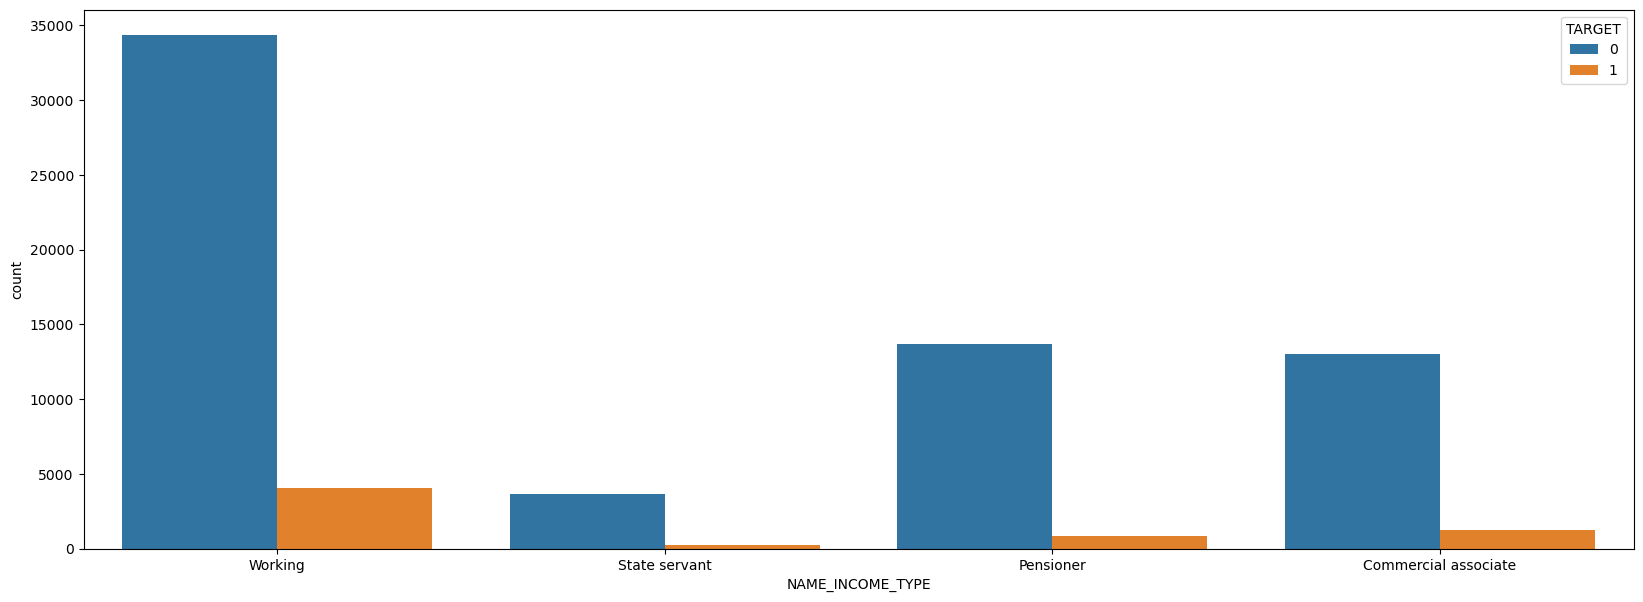

In [192]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x = "NAME_INCOME_TYPE", hue = "TARGET", data = d)
plt.show()

* Relationship of Target column with OCCUPATION_TYPE

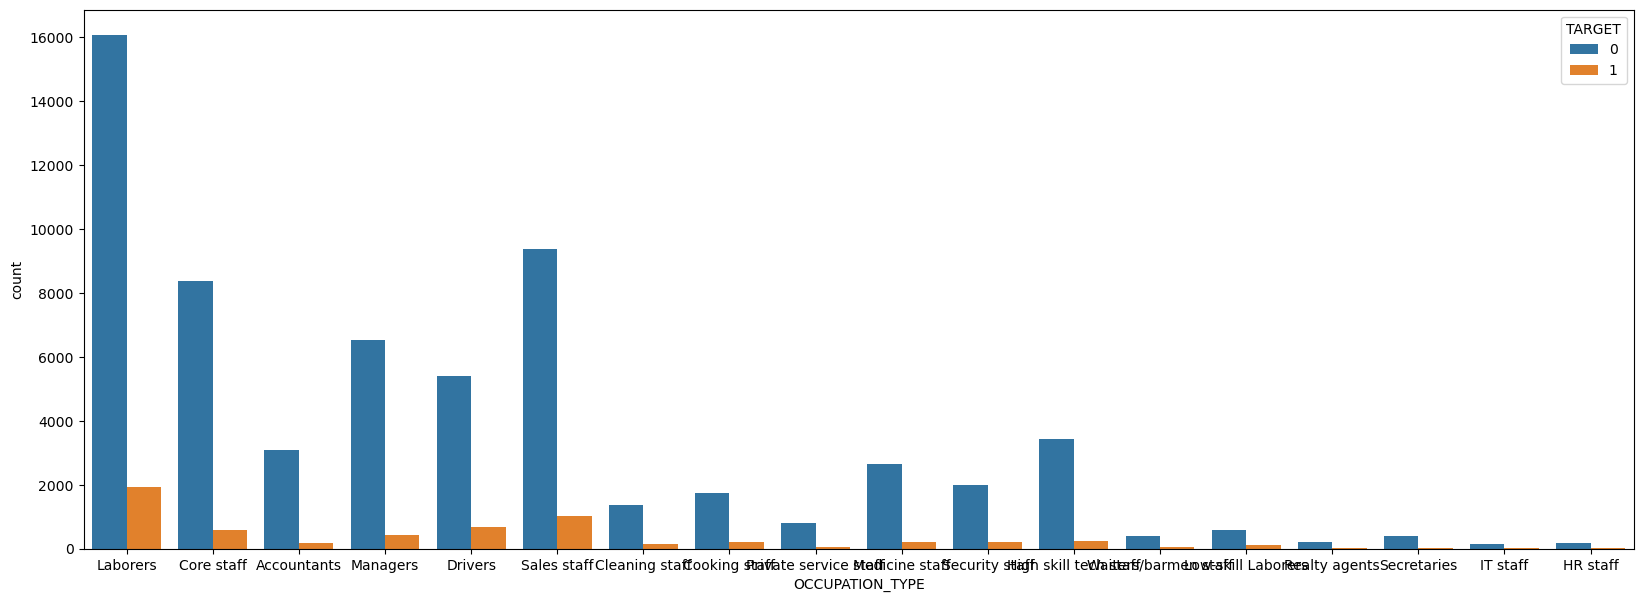

In [193]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x = "OCCUPATION_TYPE", hue = "TARGET", data = df)
plt.show()

# Further Analysis ( Level 3)

1. Among the labourers , how many of them applied for cash loan ?

In [194]:
e=df[df["OCCUPATION_TYPE"]=="Laborers"]

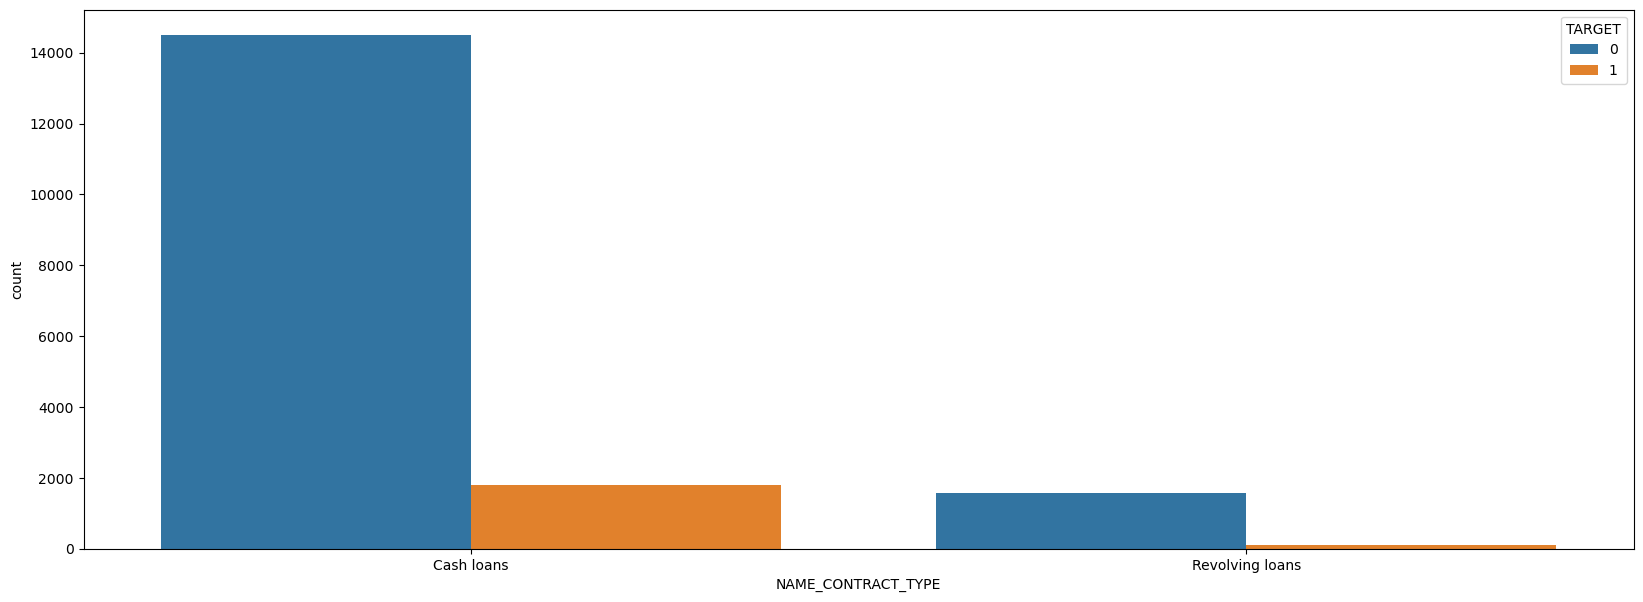

In [195]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = "TARGET", data = e)
plt.show()

* Relationship of Target column with TOTAL_DOC_SUBMITTED

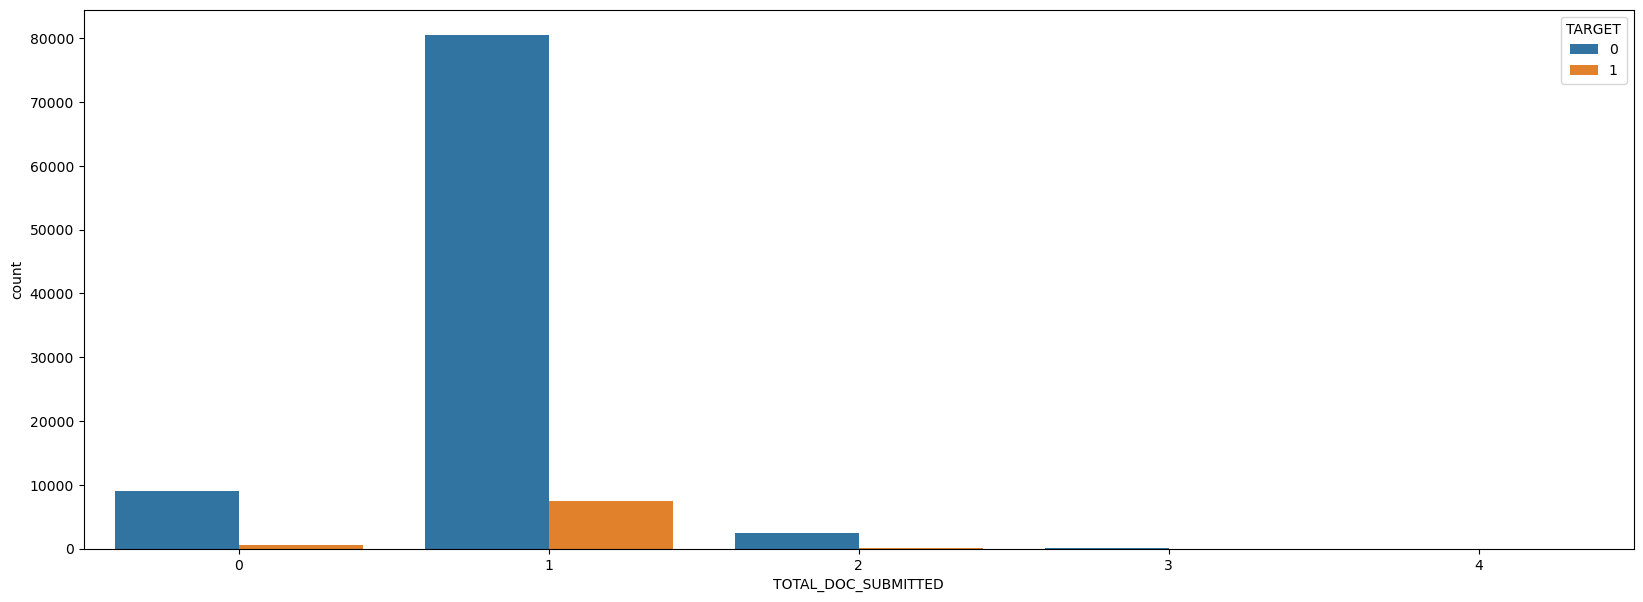

In [196]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x = "TOTAL_DOC_SUBMITTED", hue = "TARGET", data = df)
plt.show()

INTERPRETATION : More number of defaulters and non defaulters submitted single document . 

# Further Analysis ( Level 3)

1. Is there any relation between contract type and number of documents submitted ?

In [197]:
f=df[df["TOTAL_DOC_SUBMITTED"]==1]

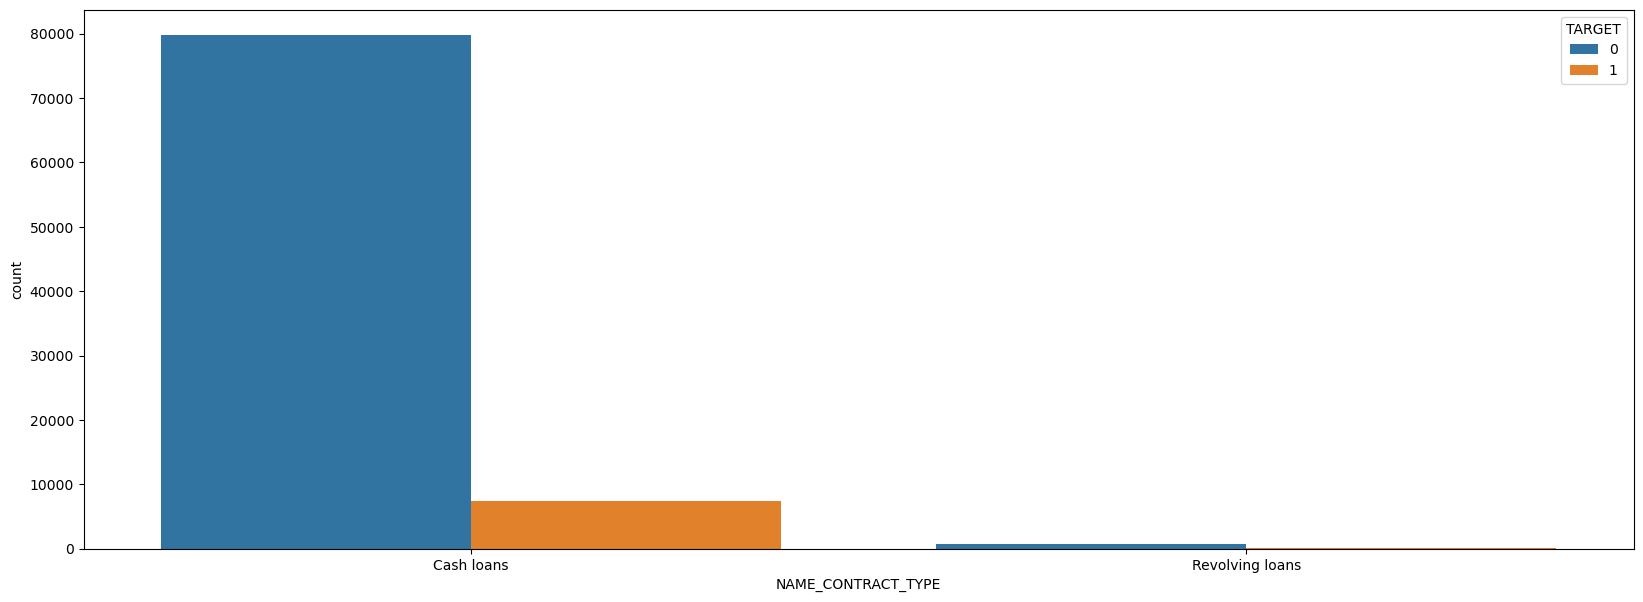

In [198]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = "TARGET", data = f)
plt.show()

# Level 2 : Bivariate Analysis ( CAT-Num Analysis)

* Relationship of Target column with AMT_INCOME_TOTAL

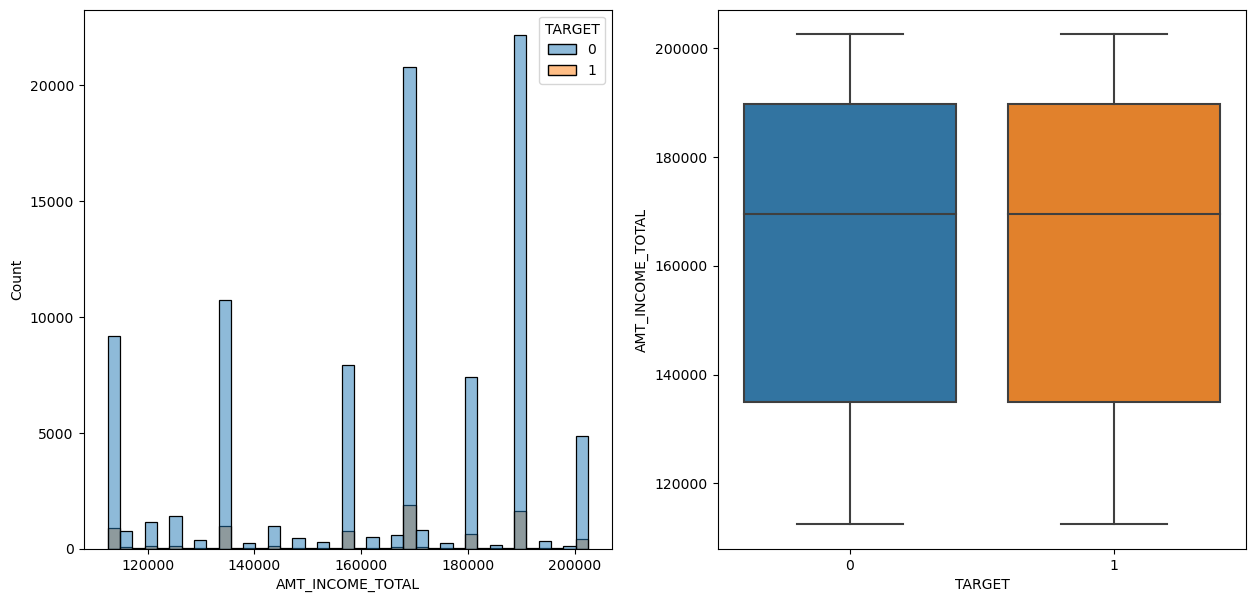

In [199]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["AMT_INCOME_TOTAL"], hue = df["TARGET"], ax = ax[0])
sns.boxplot(x = df["TARGET"] ,y = df["AMT_INCOME_TOTAL"] , ax = ax[1])
plt.show()

# Further Analysis ( Level 3)

1. Income total of non defaulters who are working 

In [200]:
g=df[df["NAME_INCOME_TYPE"]=="Working"]

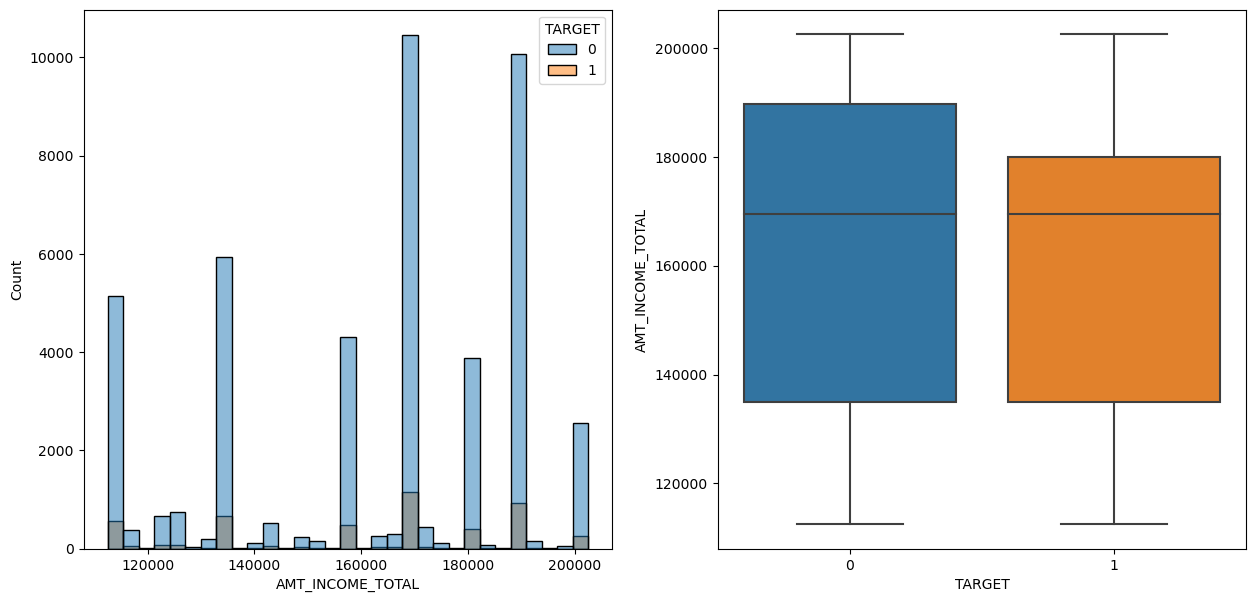

In [201]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = g["AMT_INCOME_TOTAL"], hue = g["TARGET"], ax = ax[0])
sns.boxplot(x = g["TARGET"] ,y = g["AMT_INCOME_TOTAL"] , ax = ax[1])
plt.show()

* Relationship of Target column with AMT_CREDIT

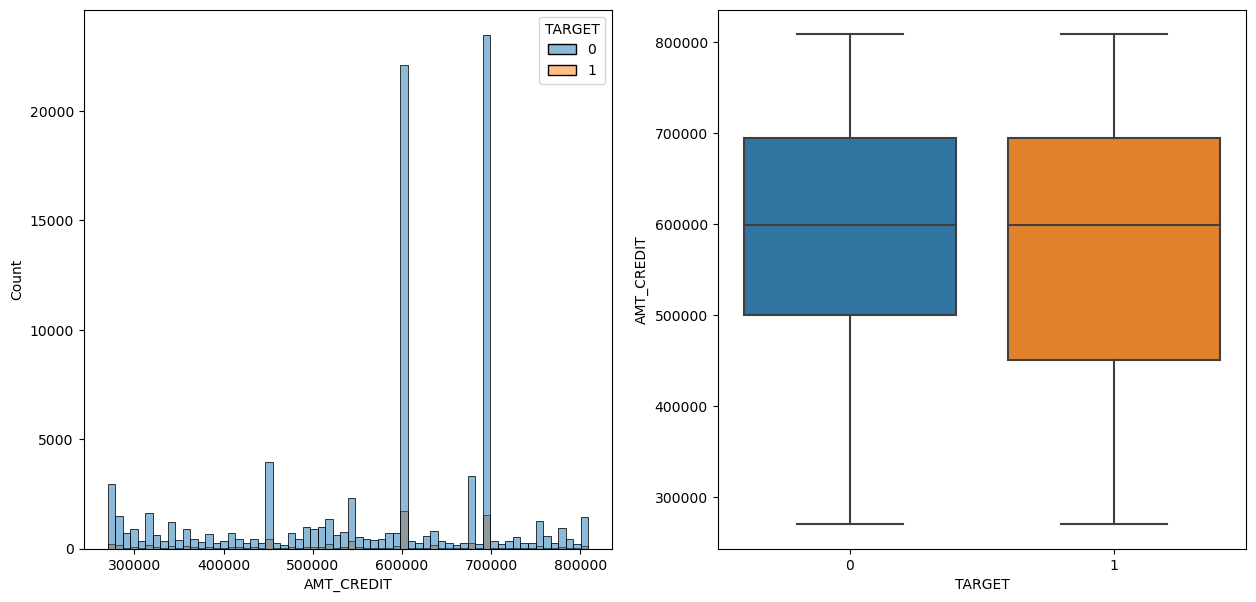

In [202]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["AMT_CREDIT"], hue = df["TARGET"], ax = ax[0])
sns.boxplot(x = df["TARGET"] ,y = df["AMT_CREDIT"] , ax = ax[1])
plt.show()

# Further Analysis ( Level 3)

1. Is there any relashion between contract type and amt credit ?

In [203]:
h=df[df["NAME_CONTRACT_TYPE"]=="Cash loans"]

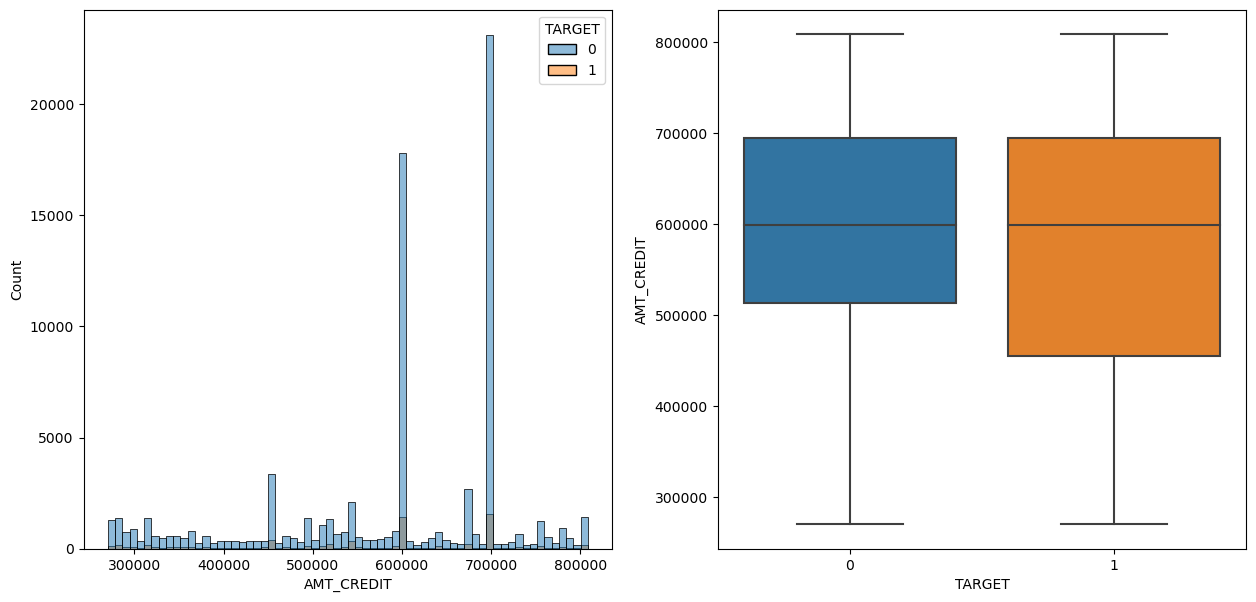

In [204]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = h["AMT_CREDIT"], hue = h["TARGET"], ax = ax[0])
sns.boxplot(x = h["TARGET"] ,y = h["AMT_CREDIT"] , ax = ax[1])
plt.show()

* Relationship of Target column with AMT_GOODS_PRICE

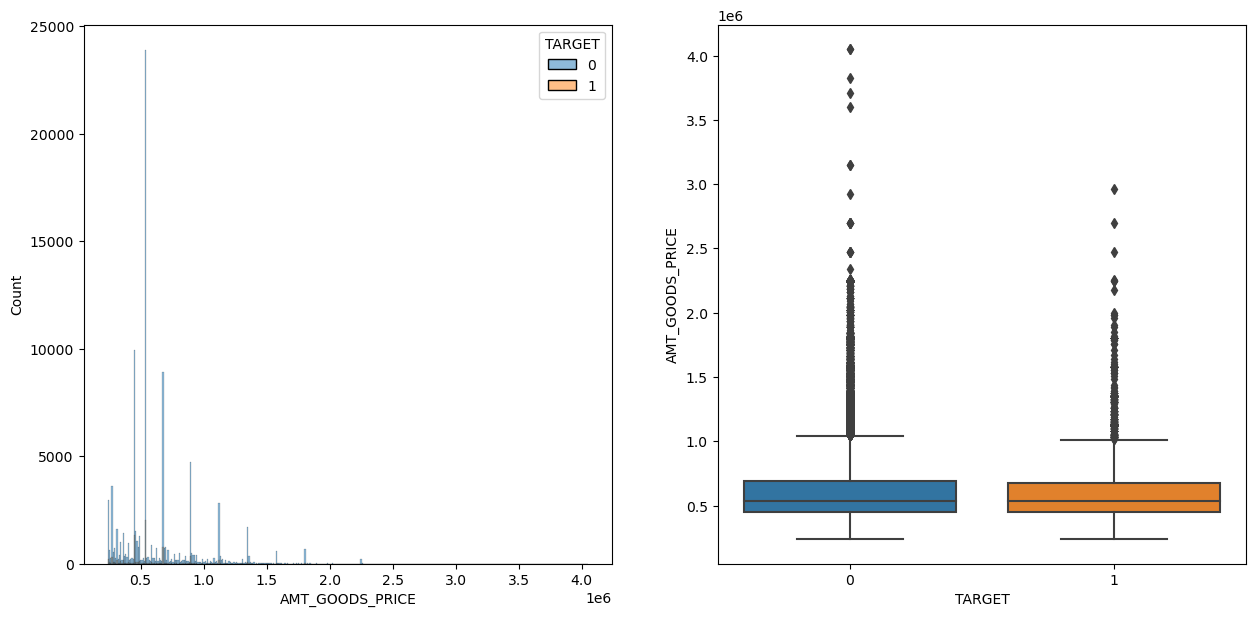

In [205]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["AMT_GOODS_PRICE"], hue = df["TARGET"], ax = ax[0])
sns.boxplot(x = df["TARGET"] ,y = df["AMT_GOODS_PRICE"] , ax = ax[1])
plt.show()

* Relationship of Target column with DAYS_EMPLOYED

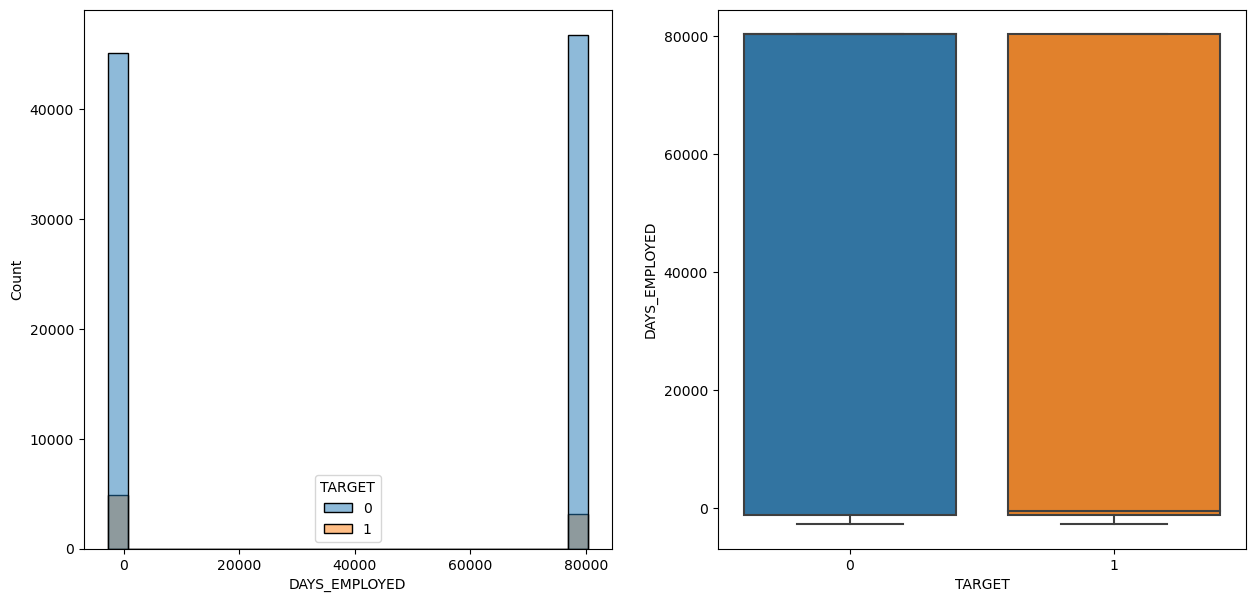

In [206]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["DAYS_EMPLOYED"], hue = df["TARGET"], ax = ax[0])
sns.boxplot(x = df["TARGET"] ,y = df["DAYS_EMPLOYED"] , ax = ax[1])
plt.show()

# LEVEL 3 : Multivariate Analysis

We have to identify those customers who have lower probability of becoming a defaulter . Also the firm should choose those people which will not cause a loss of their business by approving loans to defaulters and disapproving loans for non defaulters .
After the level 1 and level 2 analysis , it is identified that ,there is very low chance of being a defaulter for :
    
    * Female applicants
    * Who owns a house or flat 
    * Those who are working
    * Those who applied for cash loans
    * Those who are educated upto secondary special 
    * Those who have submitted  one document 
    * Those who are working as laborers , core staff , sales staff or Managers
    * Those who are earning greater than 1.5 lakhs

In [207]:
dfo=df[(df["OCCUPATION_TYPE"]=="Laborers")|(df["OCCUPATION_TYPE"]=="Core staff")|(df["OCCUPATION_TYPE"]=="Sales staff")]

In [208]:
df_final=dfo[(dfo["GENDER"]=="F")&(dfo["House"]=="Y")&(dfo["NAME_INCOME_TYPE"]=="Working")&(dfo["NAME_CONTRACT_TYPE"]=="Cash loans")&(dfo["NAME_EDUCATION_TYPE"]=="Secondary / secondary special")&(dfo["TOTAL_DOC_SUBMITTED"]==1)&(dfo["AMT_INCOME_TOTAL"]>=150000)&(dfo["TARGET"]==0)]

In [209]:
df_final

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED,AAMT_GOODS_PRICE
12,100016,0,Cash loans,F,N,Y,0,169394.65433,598987.472393,5.383209e+05,...,1,1,1,1,0,Laborers,2.0,FRIDAY,1,NaN
14,100018,0,Cash loans,F,N,Y,0,189000.00000,773680.500000,6.795000e+05,...,1,1,0,1,0,Laborers,2.0,MONDAY,1,NaN
41,100048,0,Cash loans,F,N,Y,0,202500.00000,604152.000000,5.400000e+05,...,1,1,0,1,0,Laborers,2.0,MONDAY,1,NaN
78,100093,0,Cash loans,F,N,Y,1,169394.65433,585000.000000,5.850000e+05,...,1,1,0,1,0,Core staff,3.0,TUESDAY,1,NaN
91,100108,0,Cash loans,F,N,Y,3,171000.00000,545040.000000,4.500000e+05,...,1,1,1,1,0,Sales staff,5.0,WEDNESDAY,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99940,216026,0,Cash loans,F,N,Y,0,189000.00000,694398.122963,9.675000e+05,...,1,1,0,1,0,Sales staff,2.0,TUESDAY,1,627369.421073
99970,216060,0,Cash loans,F,Y,Y,1,157500.00000,694398.122963,1.125000e+06,...,1,1,0,1,0,Core staff,3.0,WEDNESDAY,1,627369.421073
99977,216068,0,Cash loans,F,N,Y,0,157500.00000,675000.000000,6.750000e+05,...,1,1,0,1,0,Sales staff,2.0,SUNDAY,1,NaN
99989,216080,0,Cash loans,F,N,Y,0,180000.00000,694398.122963,1.350000e+06,...,1,1,0,1,0,Laborers,2.0,MONDAY,1,627369.421073


Analysis of these customers who have less chance of being defaulters with the profit of the firm 
As these are non defaulters , we need to approve a loan of higher amount for them , as they high high chance of repaying the loan amount 

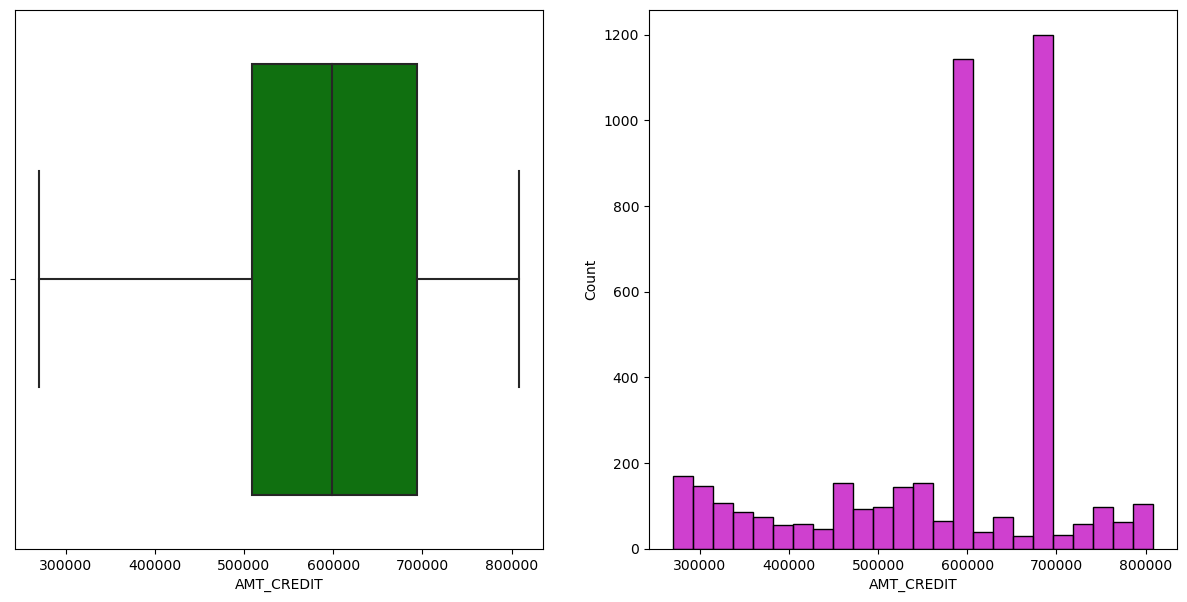

In [210]:
fig, ax = plt.subplots(1, 2, figsize= (15, 7))               
sns.histplot(x =df_final["AMT_CREDIT"], ax =ax[1], color = "m") 
sns.boxplot(x = df_final["AMT_CREDIT"], ax = ax[0], color = "g") 
plt.show()

In [211]:
final = df_final["SK_ID_CURR"]

In [212]:
pd.DataFrame(final)

,SK_ID_CURR
12,100016
14,100018
41,100048
78,100093
91,100108
...,...
99940,216026
99970,216060
99977,216068
99989,216080


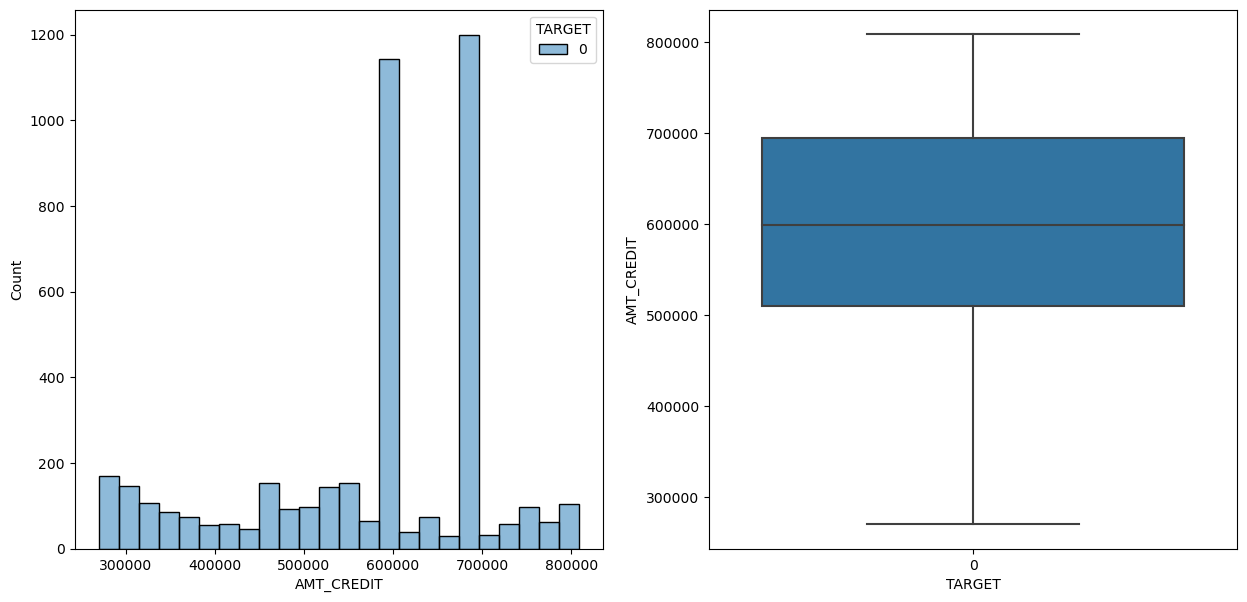

In [214]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df_final["AMT_CREDIT"], hue = df_final["TARGET"], ax = ax[0])
sns.boxplot(x = df_final["TARGET"] ,y = df_final["AMT_CREDIT"] , ax = ax[1])
plt.show()

# CONCLUSION : There are 6250 customers those who have low probability of being defaulter . And they have applied for credit amount between 5 lakh and 6 lakh . By approving this , the firm will get business profit as these applicants will be repaying the credit on time than loss of the firm .